In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import copy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
np.set_printoptions(threshold=np.inf)

In [3]:
# sample = pd.read_csv('/content/drive/MyDrive/ShapeDetection/Copy of OBJECT_DETECTION_TRAIN_SET.csv')
# # sample_new = sample.sample(frac=1)
# testData =pd.read_csv('/content/drive/MyDrive/ShapeDetection/Copy of OBJECT_DETECTION_VAL_SET.csv')
sample = pd.read_csv('/content/drive/MyDrive/Shape Detection MEC/NEW DATASET/ALL_DATASET.csv')
# sample = pd.read_csv('/content/drive/MyDrive/Shape Detection MEC/NEW DATASET/TRAINING_DATA.csv')
# sample_new = sample.sample(frac=1)
# testData =pd.read_csv('/content/drive/MyDrive/Shape Detection MEC/NEW DATASET/TEST_DATA.csv')



In [4]:
sample.head()

,J0_position,J0_Force,J1_position,J1_Force,J2_position,J2_Force,J3_position,J3_Force,J4_position,J4_Force,...,J12_position,J12_Force,J13_position,J13_Force,J14_position,J14_Force,J15_position,J15_Force,MASS_kg,Object_Held
0,0.017506,32.806920,0.618635,32.771538,0.600546,32.583837,-0.155319,32.489037,-0.001904,46.523320,...,1.480662,80.304655,0.003257,80.267427,0.033292,80.273624,0.046272,80.335211,0.25,BALL_B
1,0.016521,32.725517,0.626482,32.690883,0.600434,32.507638,-0.173685,32.417829,-0.003567,46.080938,...,1.483369,78.054184,-0.002867,78.008840,0.031468,78.004687,0.024094,78.026444,0.25,BALL_B
2,0.017239,112.943266,0.541182,112.957817,0.399660,113.049716,-0.320188,113.505282,0.013679,58.622002,...,1.545863,276.927007,0.234436,276.961801,-0.133402,276.970354,0.100363,276.988081,5.25,CUBOID_A
3,0.199408,121.551247,0.664130,121.557227,0.475432,121.593887,0.391122,68.393052,0.224457,48.681194,...,1.528395,257.231384,0.198334,257.214742,-0.267577,257.218983,0.470504,170.002003,0.25,BALL_B
4,0.042990,137.368355,0.503651,137.379651,0.057570,129.064481,0.362589,125.814621,0.029773,104.057492,...,1.607296,210.973287,-0.095384,210.938600,0.009161,210.920851,0.051706,210.871085,0.30,BALL_A


In [5]:
sample= sample.drop('MASS_kg',axis=1)

In [6]:
# testData= testData.drop('MASS_kg',axis=1)

In [7]:
X_train= sample.drop('Object_Held', axis=1)
y_train= sample[['Object_Held']]
# X_test= testData.drop('Object_Held', axis=1)
# y_test= testData[['Object_Held']]

In [8]:
X_train.columns = sample.columns[:-1]
cols=sample.columns[:-1]

In [9]:
# Cube_A_df = X_train[y_train['Object_Held']=='CUBE_A']
# Cube_B_df = X_train[y_train['Object_Held']=='CUBE_B']
# Cube_C_df = X_train[y_train['Object_Held']=='CUBE_C']
# Sphere_A_df = X_train[y_train['Object_Held']=='SPHERE_A']
# Sphere_B_df = X_train[y_train['Object_Held']=='SPHERE_B']
# Sphere_C_df = X_train[y_train['Object_Held']=='SPHERE_C']
# Ball_A_df = X_train[y_train['Object_Held']=='BALL_A']
# Ball_B_df = X_train[y_train['Object_Held']=='BALL_B']
# Ball_C_df = X_train[y_train['Object_Held']=='BALL_C']
# Rugby_A_df = X_train[y_train['Object_Held']=='RUGBY_A']
# Rugby_B_df = X_train[y_train['Object_Held']=='RUGBY_B']
# Cuboid_A_df = X_train[y_train['Object_Held']=='CUBOID_A']
# Cuboid_B_df = X_train[y_train['Object_Held']=='CUBOID_B']

In [10]:
y_train.Object_Held.value_counts()

BALL_B      10000
CUBOID_A    10000
BALL_A      10000
CUBOID_B    10000
SPHERE_A    10000
CUBE_C      10000
BALL_C      10000
CUBE_A      10000
SPHERE_B    10000
RUGBY_A     10000
CUBE_B      10000
SPHERE_C    10000
RUGBY_B     10000
Name: Object_Held, dtype: int64

In [11]:
X_train

,J0_position,J0_Force,J1_position,J1_Force,J2_position,J2_Force,J3_position,J3_Force,J4_position,J4_Force,...,J11_position,J11_Force,J12_position,J12_Force,J13_position,J13_Force,J14_position,J14_Force,J15_position,J15_Force
0,0.017506,32.806920,0.618635,32.771538,0.600546,32.583837,-0.155319,32.489037,-0.001904,46.523320,...,0.211301,19.395867,1.480662,80.304655,0.003257,80.267427,0.033292,80.273624,0.046272,80.335211
1,0.016521,32.725517,0.626482,32.690883,0.600434,32.507638,-0.173685,32.417829,-0.003567,46.080938,...,0.265462,16.127367,1.483369,78.054184,-0.002867,78.008840,0.031468,78.004687,0.024094,78.026444
2,0.017239,112.943266,0.541182,112.957817,0.399660,113.049716,-0.320188,113.505282,0.013679,58.622002,...,0.408030,113.475348,1.545863,276.927007,0.234436,276.961801,-0.133402,276.970354,0.100363,276.988081
3,0.199408,121.551247,0.664130,121.557227,0.475432,121.593887,0.391122,68.393052,0.224457,48.681194,...,0.473156,121.291125,1.528395,257.231384,0.198334,257.214742,-0.267577,257.218983,0.470504,170.002003
4,0.042990,137.368355,0.503651,137.379651,0.057570,129.064481,0.362589,125.814621,0.029773,104.057492,...,0.504908,86.318927,1.607296,210.973287,-0.095384,210.938600,0.009161,210.920851,0.051706,210.871085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129995,0.082820,74.715061,0.781615,74.299227,0.408121,72.401245,0.384430,73.853273,0.079660,161.432459,...,0.623845,141.127376,1.497460,279.240650,0.305885,279.592017,-0.401631,279.345125,0.443123,277.936691
129996,0.006005,19.688731,1.265589,19.648518,0.142586,19.439848,-0.019936,19.374400,0.005135,32.119580,...,-0.038762,8.964358,1.560369,52.003727,-0.031085,51.938205,0.237372,51.875608,-0.263823,51.656754
129997,-0.003012,10.529745,0.713522,10.419739,0.522266,9.818970,0.052254,9.492058,-0.002707,10.763965,...,0.030048,9.535537,1.620188,10.519516,0.005382,10.356742,0.348537,10.246656,-0.030570,9.895118
129998,0.010664,26.647924,0.456596,26.636323,0.219777,26.576672,-0.043047,26.615257,0.007313,15.459081,...,0.350358,37.883348,1.593645,86.292200,0.172623,86.254821,0.020778,86.196876,0.078973,85.986033


In [ ]:
X_tr1= sample.drop('Object_Held', axis=1)

In [ ]:
X_tr1.describe()

,J0_position,J0_Force,J1_position,J1_Force,J2_position,J2_Force,J3_position,J3_Force,J4_position,J4_Force,...,J11_position,J11_Force,J12_position,J12_Force,J13_position,J13_Force,J14_position,J14_Force,J15_position,J15_Force
count,104000.000000,104000.000000,104000.000000,104000.000000,104000.000000,104000.000000,104000.000000,104000.000000,104000.000000,104000.000000,...,104000.000000,104000.000000,104000.000000,104000.000000,104000.000000,104000.000000,104000.000000,104000.000000,104000.000000,104000.000000
mean,0.010377,59.019077,0.757873,58.912398,0.439070,57.599880,0.105654,54.318285,0.017875,73.127612,...,0.343013,73.192579,1.538761,168.922281,0.097913,168.779236,-0.045654,168.651112,0.157913,151.315163
std,0.055551,46.583395,0.270122,46.528936,0.205687,42.997361,0.307863,39.434538,0.040321,104.034816,...,0.299632,72.030838,0.093073,152.145587,0.187873,151.753968,0.243162,151.604452,0.271902,149.612572
min,-0.245457,0.869717,0.150982,0.819148,-0.867079,1.449388,-0.878010,3.215971,-0.170895,3.086973,...,-0.589622,2.924713,0.346626,1.215740,-1.108879,1.435768,-0.493507,1.644472,-0.504787,2.091536
25%,0.001237,27.554567,0.576603,27.540487,0.311816,27.365424,-0.135092,25.684883,0.000031,23.781059,...,0.142518,19.096364,1.526144,66.929315,0.000537,66.907825,-0.292109,66.837465,-0.033042,53.333417
50%,0.014506,44.450103,0.694840,44.443107,0.443937,44.220685,0.168104,43.202844,0.011537,46.745350,...,0.313514,39.722224,1.548317,124.227595,0.099363,124.280676,-0.001013,124.143252,0.104243,93.046680
75%,0.030121,85.215340,0.848801,84.945624,0.597703,83.277963,0.321878,77.314024,0.026729,77.366670,...,0.499017,109.572627,1.588869,243.552500,0.199183,243.772409,0.077355,243.557953,0.353742,226.429805
max,0.302955,630.731861,1.710592,633.479712,1.243738,358.339848,1.044886,358.601367,0.263529,6920.296996,...,1.699928,826.251721,1.730182,2134.194766,1.425054,2137.999104,0.872015,2132.662026,1.820740,2124.201220


In [ ]:
X_train[y_train['Object_Held']=='CUBE_A'].describe()

,J0_position,J0_Force,J1_position,J1_Force,J2_position,J2_Force,J3_position,J3_Force,J4_position,J4_Force,...,J11_position,J11_Force,J12_position,J12_Force,J13_position,J13_Force,J14_position,J14_Force,J15_position,J15_Force
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,-0.043765,0.068538,-0.549501,0.070372,-0.426871,0.103928,-0.752452,0.187954,-0.399678,-0.174418,...,-0.611163,0.054843,0.021051,0.085469,-0.117247,0.086384,-0.608123,0.087052,0.417427,0.050316
std,0.370571,0.984883,0.771507,0.986286,0.909231,1.071080,0.644314,1.169268,0.450388,0.533513,...,1.028590,1.159341,2.097906,0.982522,0.670715,0.985504,1.131262,0.986450,0.887667,0.884180
min,-2.462406,-1.212589,-2.246216,-1.209843,-5.810705,-1.268665,-2.788675,-1.294532,-2.091657,-0.713918,...,-2.631663,-0.960016,-12.742991,-1.060880,-2.358793,-1.063086,-1.842116,-1.063348,-1.573235,-0.996141
25%,-0.208292,-0.800761,-1.137185,-0.800242,-1.096029,-0.843614,-1.389442,-0.844989,-0.568607,-0.552921,...,-1.165187,-0.748723,0.205260,-0.633699,-0.516148,-0.634614,-1.252162,-0.634421,-0.272523,-0.618580
50%,-0.075104,0.017792,-0.631973,0.019735,-0.499877,0.053615,-0.670880,0.137155,-0.418268,-0.430619,...,-0.693881,-0.402634,0.553584,-0.137538,-0.177848,-0.137312,-1.060807,-0.136550,0.589206,-0.192143
75%,0.129159,0.622132,-0.046143,0.623983,0.413207,0.707111,-0.167195,0.857354,-0.149359,0.098054,...,-0.190153,0.489497,0.848698,0.594876,0.266037,0.597728,-0.140477,0.599305,0.771227,0.520317
max,1.698767,6.417485,1.646341,6.427610,2.108627,7.002185,0.929468,7.726812,1.720711,3.853421,...,4.532236,10.453324,1.925980,5.853377,5.919731,5.870366,3.772319,5.876711,6.109353,3.574928


In [ ]:
col=X_train.columns

## Standard Scalar

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scalar = StandardScaler().fit(X_train)
scalar
X_train= scalar.transform(X_train)


In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scalar = StandardScaler().fit(X_test)
# scalar
# X_test= scalar.transform(X_test)

In [ ]:
X_train= pd.DataFrame(X_train)
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
count,1.300000e+05,1.300000e+05,1.300000e+05,1.300000e+05,1.300000e+05,1.300000e+05,1.300000e+05,1.300000e+05,1.300000e+05,1.300000e+05,...,1.300000e+05,1.300000e+05,1.300000e+05,1.300000e+05,1.300000e+05,1.300000e+05,1.300000e+05,1.300000e+05,1.300000e+05,1.300000e+05
mean,-1.136868e-17,-1.563194e-17,-1.337733e-17,-1.923931e-17,2.448640e-17,-3.410605e-17,-1.902068e-17,-2.268271e-17,2.011383e-17,1.060348e-17,...,2.656337e-17,2.426777e-17,-2.186285e-18,2.721925e-17,-2.066040e-17,1.093143e-17,-1.913000e-17,5.902970e-18,1.896603e-17,-8.417199e-18
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,...,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-4.604859e+00,-1.247216e+00,-2.246216e+00,-1.251454e+00,-6.351641e+00,-1.306847e+00,-3.195942e+00,-1.298753e+00,-4.675939e+00,-7.139183e-01,...,-3.114190e+00,-9.757320e-01,-1.274299e+01,-1.103626e+00,-6.421881e+00,-1.104116e+00,-1.842116e+00,-1.102777e+00,-2.434673e+00,-9.977781e-01
25%,-1.657158e-01,-6.754530e-01,-6.698664e-01,-6.742804e-01,-6.189975e-01,-7.039017e-01,-7.819479e-01,-7.269487e-01,-4.419128e-01,-4.874263e-01,...,-6.704101e-01,-7.511401e-01,-1.326093e-01,-6.716037e-01,-5.180342e-01,-6.726211e-01,-1.014070e+00,-6.729623e-01,-7.022994e-01,-6.559631e-01
50%,7.282302e-02,-3.118095e-01,-2.330807e-01,-3.100482e-01,2.306951e-02,-3.103711e-01,2.031495e-01,-2.805776e-01,-1.566478e-01,-2.595144e-01,...,-9.732800e-02,-4.641975e-01,1.026422e-01,-2.934137e-01,5.992789e-03,-2.926050e-01,1.835178e-01,-2.929693e-01,-1.976901e-01,-3.889483e-01
75%,3.546574e-01,5.608703e-01,3.342427e-01,5.580015e-01,7.713326e-01,5.966814e-01,7.021440e-01,5.833175e-01,2.194295e-01,4.284833e-02,...,5.238640e-01,5.051815e-01,5.370502e-01,4.924186e-01,5.390238e-01,4.963240e-01,5.056519e-01,4.960772e-01,7.196048e-01,5.020472e-01
max,5.270756e+00,1.226125e+01,3.526405e+00,1.233704e+01,3.912937e+00,7.002185e+00,3.051407e+00,7.726812e+00,6.085891e+00,6.778684e+01,...,4.532236e+00,1.045332e+01,2.046580e+00,1.295073e+01,7.280052e+00,1.301085e+01,3.772319e+00,1.298571e+01,6.109353e+00,1.319931e+01


In [ ]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.126947,-0.562268,-0.515280,-0.561416,0.785192,-0.581983,-0.847971,-0.553613,-0.489566,-0.262191,...,-0.439342,-0.747087,-0.620675,-0.582503,-0.503270,-0.583324,0.323843,-0.582948,-0.410072,-0.474322
1,0.109226,-0.564014,-0.486235,-0.563148,0.784650,-0.583757,-0.907642,-0.555421,-0.530782,-0.266571,...,-0.258460,-0.792459,-0.591737,-0.597332,-0.535864,-0.598245,0.316344,-0.597948,-0.491556,-0.489767
2,0.122141,1.156392,-0.801959,1.160350,-0.191684,1.291403,-1.383621,1.503497,-0.103550,-0.142417,...,0.217673,0.558882,0.076288,0.713056,0.727023,0.716115,-0.361529,0.717445,-0.211342,0.841302
3,3.400113,1.341005,-0.346889,1.344997,0.176784,1.490326,0.927373,0.358038,5.117992,-0.240829,...,0.435175,0.667377,-0.110431,0.583280,0.534898,0.585659,-0.913194,0.586866,1.148562,0.125557
4,0.585515,1.680230,-0.940874,1.684738,-1.855215,1.664254,0.834673,1.816048,0.295147,0.307386,...,0.541220,0.181909,0.732986,0.278482,-1.028222,0.279941,0.224626,0.280781,-0.390110,0.398974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129995,1.302205,0.336523,0.087962,0.330270,-0.150542,0.345036,0.905631,0.496680,1.530970,0.875387,...,0.938433,0.942735,-0.441111,0.728301,1.107265,0.733492,-1.464363,0.733145,1.047963,0.847648
129996,-0.080012,-0.843610,1.879305,-0.843195,-1.441795,-0.887998,-0.408124,-0.886611,-0.315193,-0.404786,...,-1.274481,-0.891892,0.231353,-0.768980,-0.686034,-0.770477,1.162926,-0.770692,-1.549366,-0.666183
129997,-0.242266,-1.040040,-0.164071,-1.041356,0.404528,-1.111989,-0.173584,-1.137537,-0.509462,-0.616202,...,-1.044675,-0.883963,0.870786,-1.042323,-0.491965,-1.045181,1.619986,-1.045907,-0.692394,-0.945572
129998,0.003834,-0.694359,-1.115037,-0.693152,-1.066430,-0.721840,-0.483207,-0.702756,-0.261255,-0.569721,...,0.025068,-0.490452,0.587054,-0.543051,0.398067,-0.543769,0.272391,-0.543788,-0.289931,-0.436517


In [ ]:
y_train

,Object_Held
0,BALL_B
1,BALL_B
2,CUBOID_A
3,BALL_B
4,BALL_A
...,...
129995,SPHERE_A
129996,CUBE_C
129997,CUBE_A
129998,CUBE_A


In [ ]:
# X_test= pd.DataFrame(X_test)
# X_test.describe()

In [ ]:
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig

In [ ]:
A= X_train

## PCA

In [ ]:
M = mean(A.T, axis=1)
# print(M)
# center columns by subtracting column means
C = A - M
# print(C)
# calculate covariance matrix of centered matrix
V = cov(C.T)
# print(V)
# eigendecomposition of covariance matrix
values, vectors = eig(V)
# print(vectors)
print(values)
# project data
P = vectors.T.dot(C.T)
# print(P.T)

[1.26504077e+01 3.99497932e+00 3.79629403e+00 2.02756546e+00
 1.64952166e+00 1.47281836e+00 9.98675969e-01 9.88875619e-01
 7.37854004e-01 6.82116104e-01 5.43371227e-01 4.91291421e-01
 4.03223267e-01 3.80143976e-01 3.10080355e-01 1.84168181e-01
 1.48604771e-01 1.25284175e-01 1.11477606e-01 8.18810649e-02
 5.56159230e-02 5.90120499e-02 3.69258695e-02 3.10449091e-02
 1.87124261e-02 1.45440390e-02 4.61097480e-03 8.99682804e-04
 2.20209588e-04 1.73503470e-05 4.86157732e-06 3.60741107e-06]


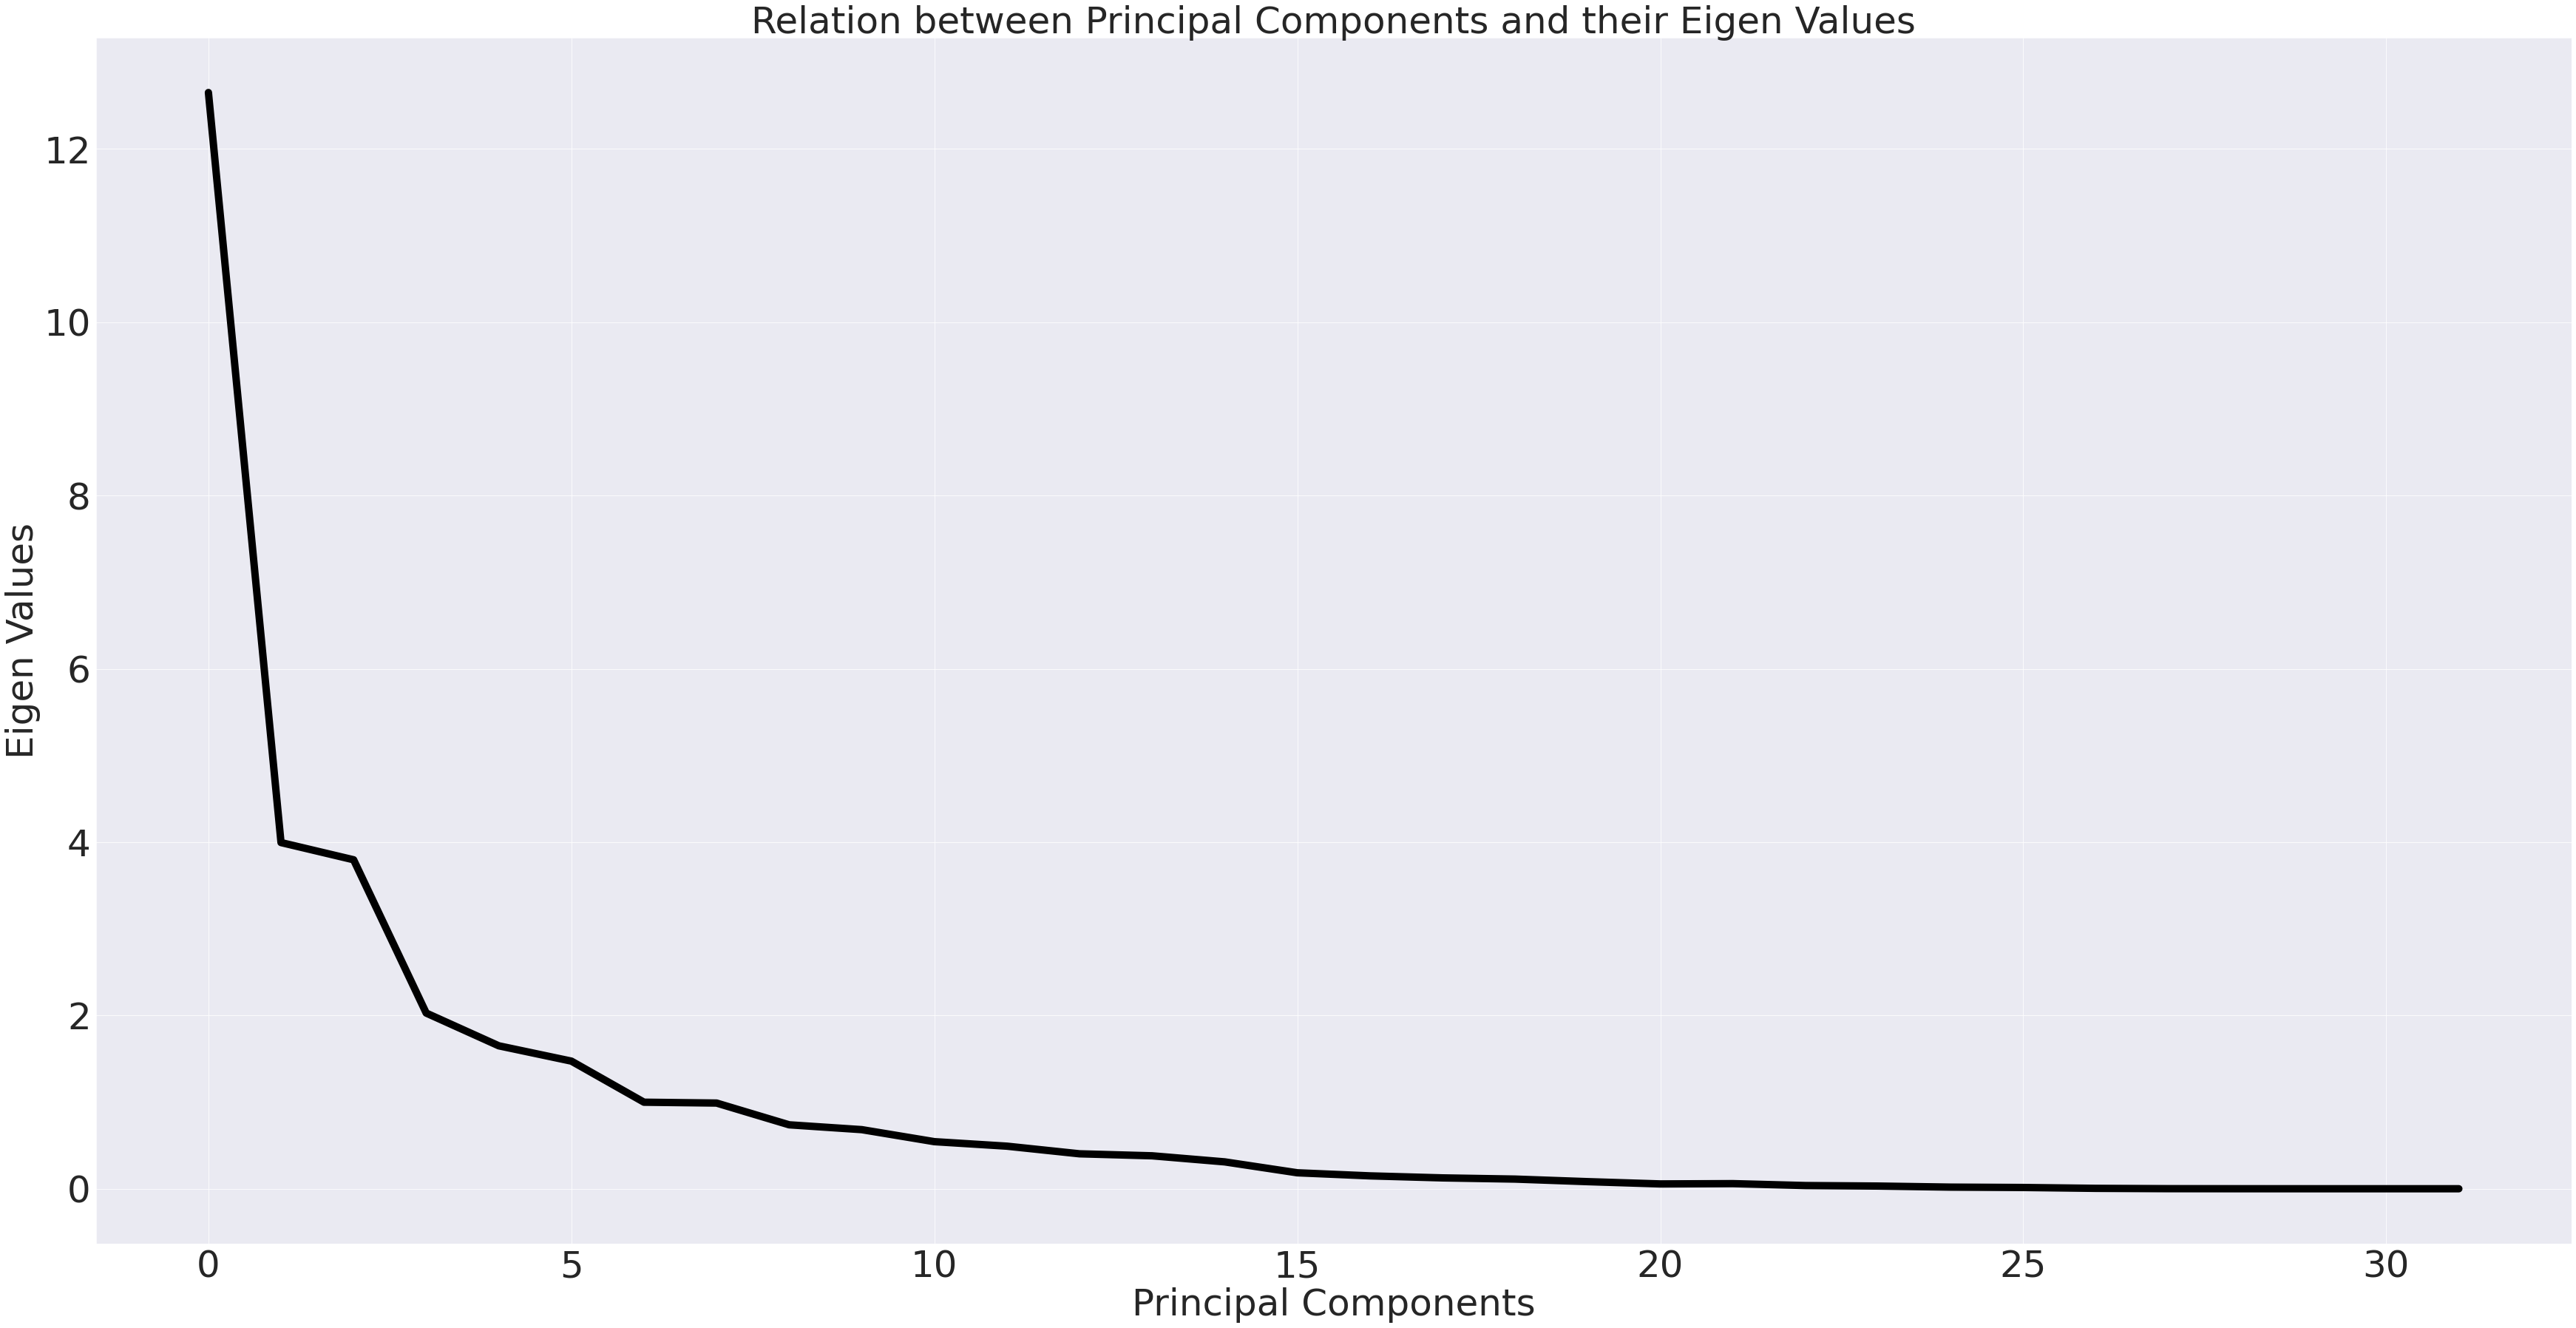

In [ ]:
plt.rcParams["figure.figsize"] = (60,30)
sns.set_style("darkgrid")
plt.plot(values, color='black',linewidth=10)
plt.grid(True)
plt.tick_params(labelsize=50)

plt.xlabel("Principal Components", size=50)
plt.ylabel("Eigen Values", size=50)
plt.title("Relation between Principal Components and their Eigen Values", size=50)
plt.savefig( "test.png")
plt.show()

In [ ]:
pc_no = [i for i in range(1,33)]

In [ ]:
values = pd.DataFrame([pc_no, values]).T
values.columns = ['PC','Eigen Values']

In [ ]:
# values.to_csv('/content/drive/MyDrive/Shape Detection MEC/Other new data/PCA_eigenvalues.csv')

In [ ]:
from sklearn.decomposition import PCA
# pca = PCA(n_components=5)
pca = PCA()
principalComponents = pca.fit_transform(X_train)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC{}'.format(i) for i in range(1,33,1)])#, 'principal component 6', 'principal component 7', 'principal component 8', 'principal component 9', 'principal component 10'])

In [ ]:
principalDf

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32
0,-2.195944,-0.044956,0.645625,-0.434757,0.405049,1.317086,-0.968363,0.928541,-0.721322,2.093130,...,0.070841,0.073584,-0.005114,-0.053424,-0.003890,0.002416,0.000262,0.000983,0.000282,0.000194
1,-2.278252,-0.046328,0.646515,-0.443495,0.410900,1.375538,-0.982799,0.872527,-0.696828,2.080808,...,0.087326,0.075941,0.014058,-0.036362,-0.000683,0.002092,0.000482,0.001026,0.000228,0.000198
2,2.570662,0.807569,0.018607,-1.029670,-2.265708,0.461862,-1.270102,0.435449,0.788542,0.375427,...,0.008660,0.016067,0.024743,-0.012728,-0.003513,0.003842,0.000741,-0.000992,0.000100,-0.000292
3,3.046781,0.255259,1.202041,-4.072491,0.913577,-5.116489,0.282324,-0.614541,0.353715,0.226090,...,-0.082603,-0.170054,0.232937,0.018738,-0.051952,0.009063,-0.002532,0.001110,-0.000702,-0.001186
4,2.427606,1.848691,0.393017,-1.492279,-0.635315,0.703020,-0.962219,-0.942244,-1.961514,-0.454094,...,0.154105,-0.019207,0.016216,0.049173,-0.007565,0.001818,0.002025,-0.003082,-0.001133,0.000641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129995,4.110044,-0.427118,-0.367884,-1.172742,0.917106,-0.772265,1.528731,1.390571,-0.625156,0.371337,...,-0.132101,0.007766,-0.050261,-0.057704,-0.005299,0.002974,0.000416,0.000875,0.001076,0.001747
129996,-3.427540,1.682140,-3.227939,1.187623,0.656710,-0.318615,0.936992,0.665195,-0.846334,0.597255,...,-0.008355,0.028323,0.003282,0.259496,-0.009340,0.000597,-0.000813,-0.000863,0.000147,-0.000003
129997,-4.445164,0.425766,0.181569,0.579550,0.089520,0.566268,0.479417,-0.565480,0.702703,0.060963,...,-0.342230,-0.021073,0.125272,2.127181,-0.004551,-0.006300,0.005865,0.001660,-0.000578,0.000837
129998,-2.211700,-0.338412,1.312817,-0.137541,-1.665933,-0.174784,-0.299459,0.989482,-0.143806,-0.866634,...,0.028159,0.051570,0.026444,0.057506,0.005353,-0.004474,-0.000373,0.000274,-0.001437,0.000001


pca.explained_variance_ratio_.shape, pca.explained_variance_ratio_

In [ ]:
Principal_Components = pca.components_

In [ ]:
PC_T = Principal_Components.T

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


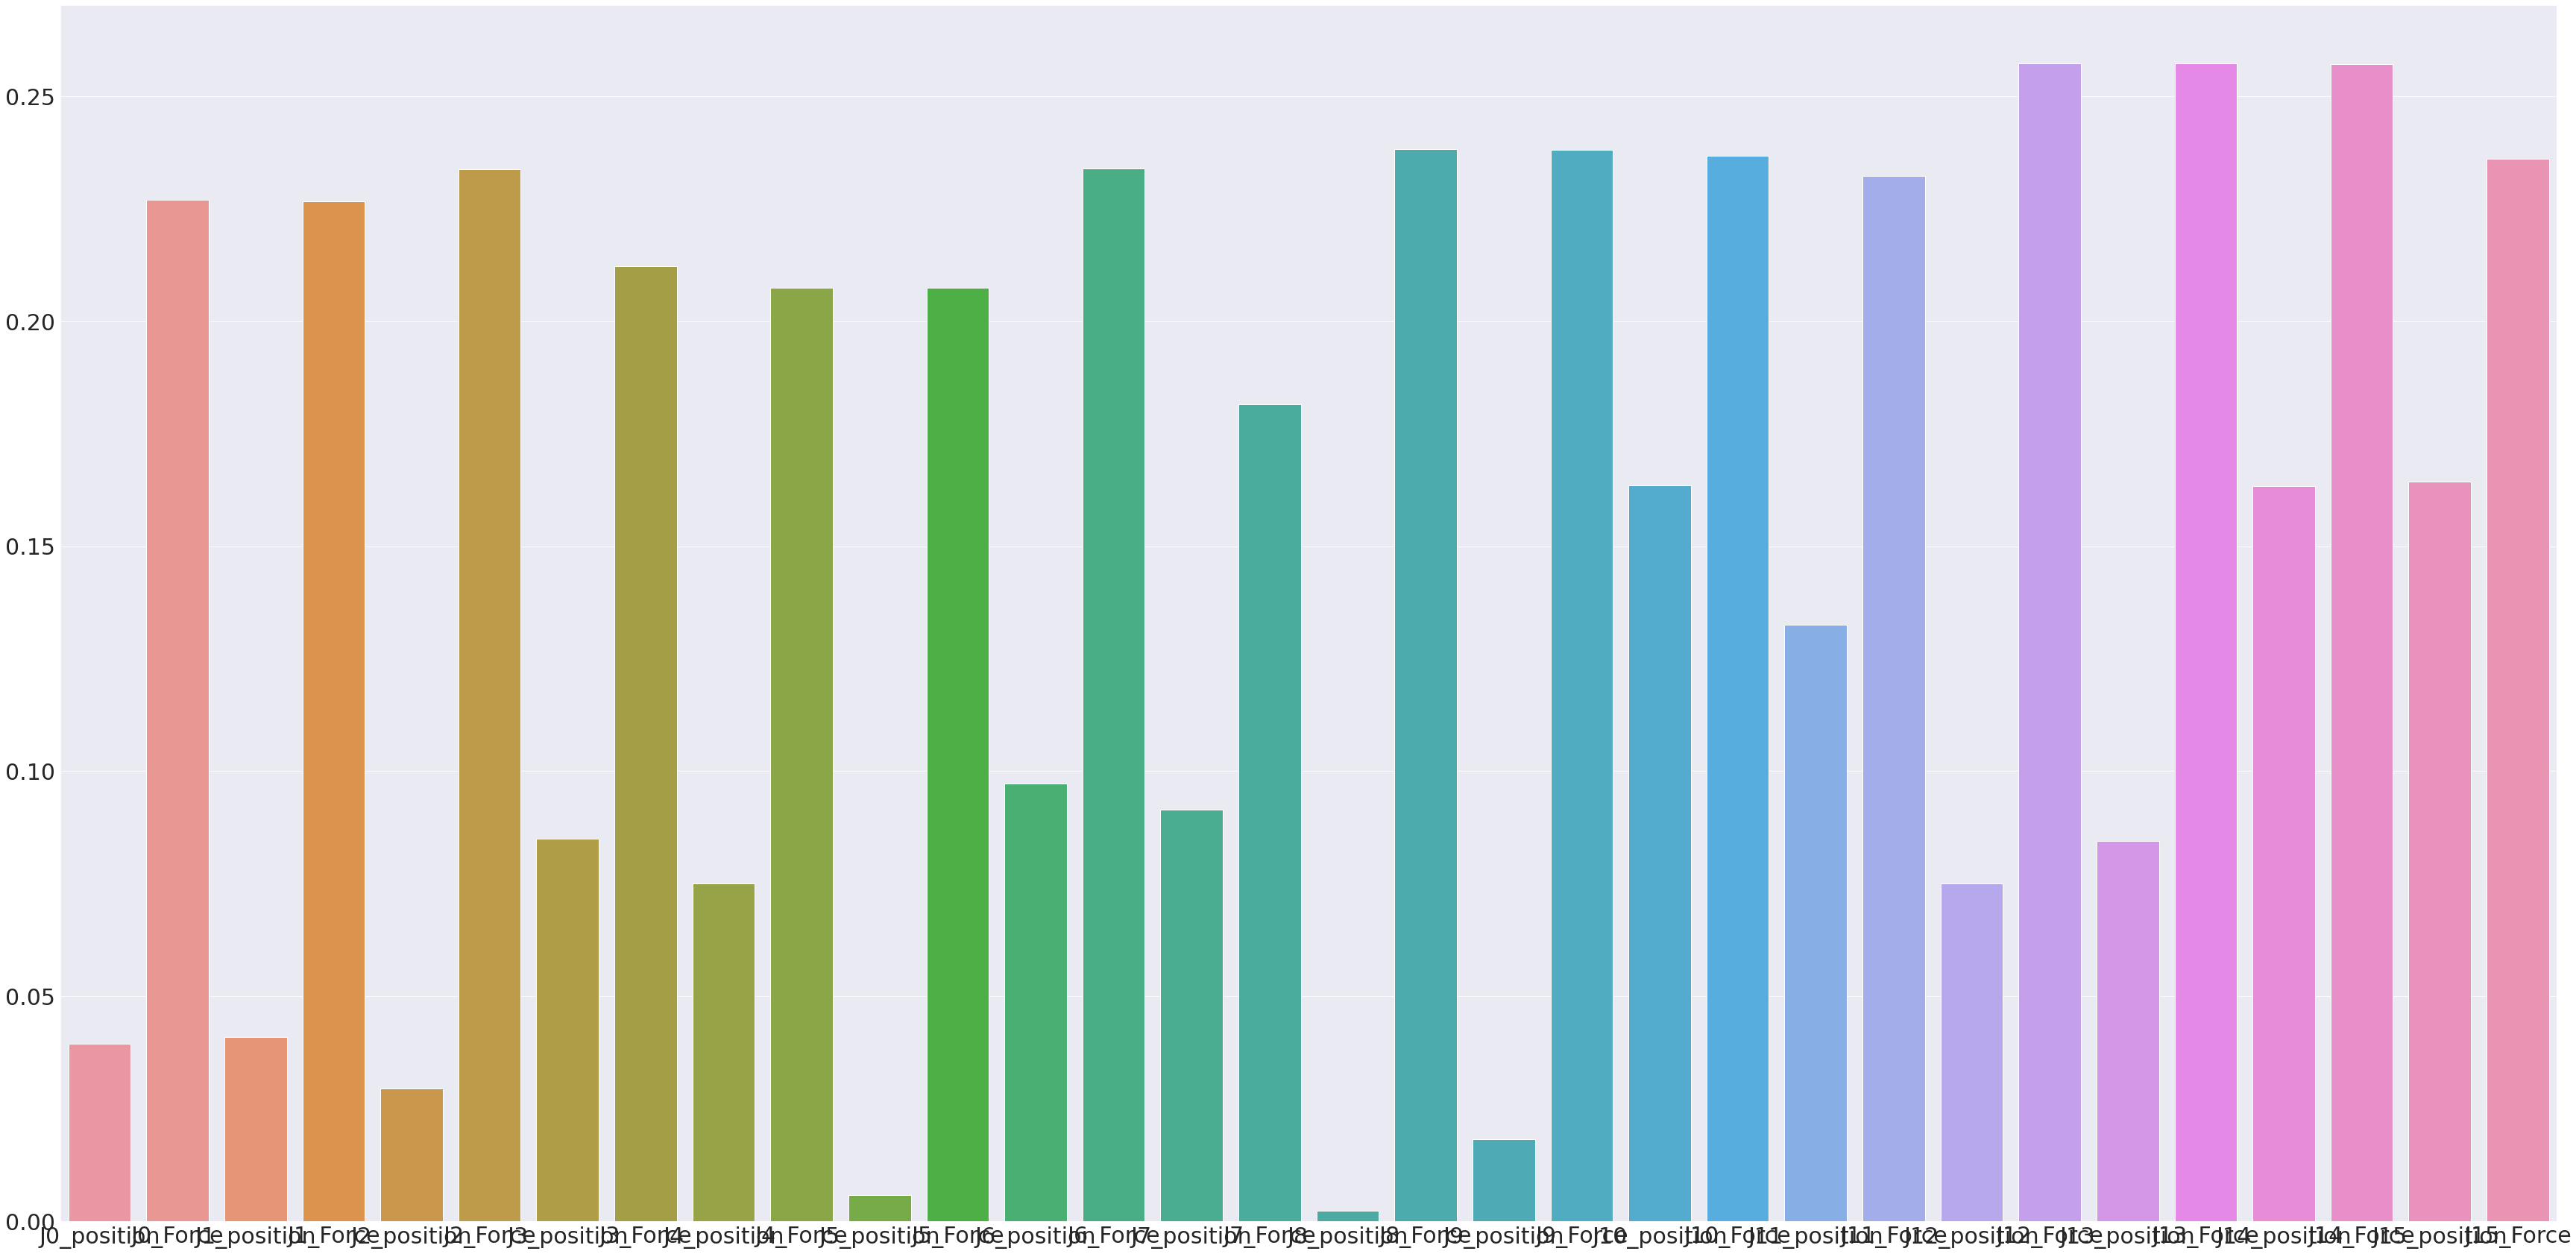

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


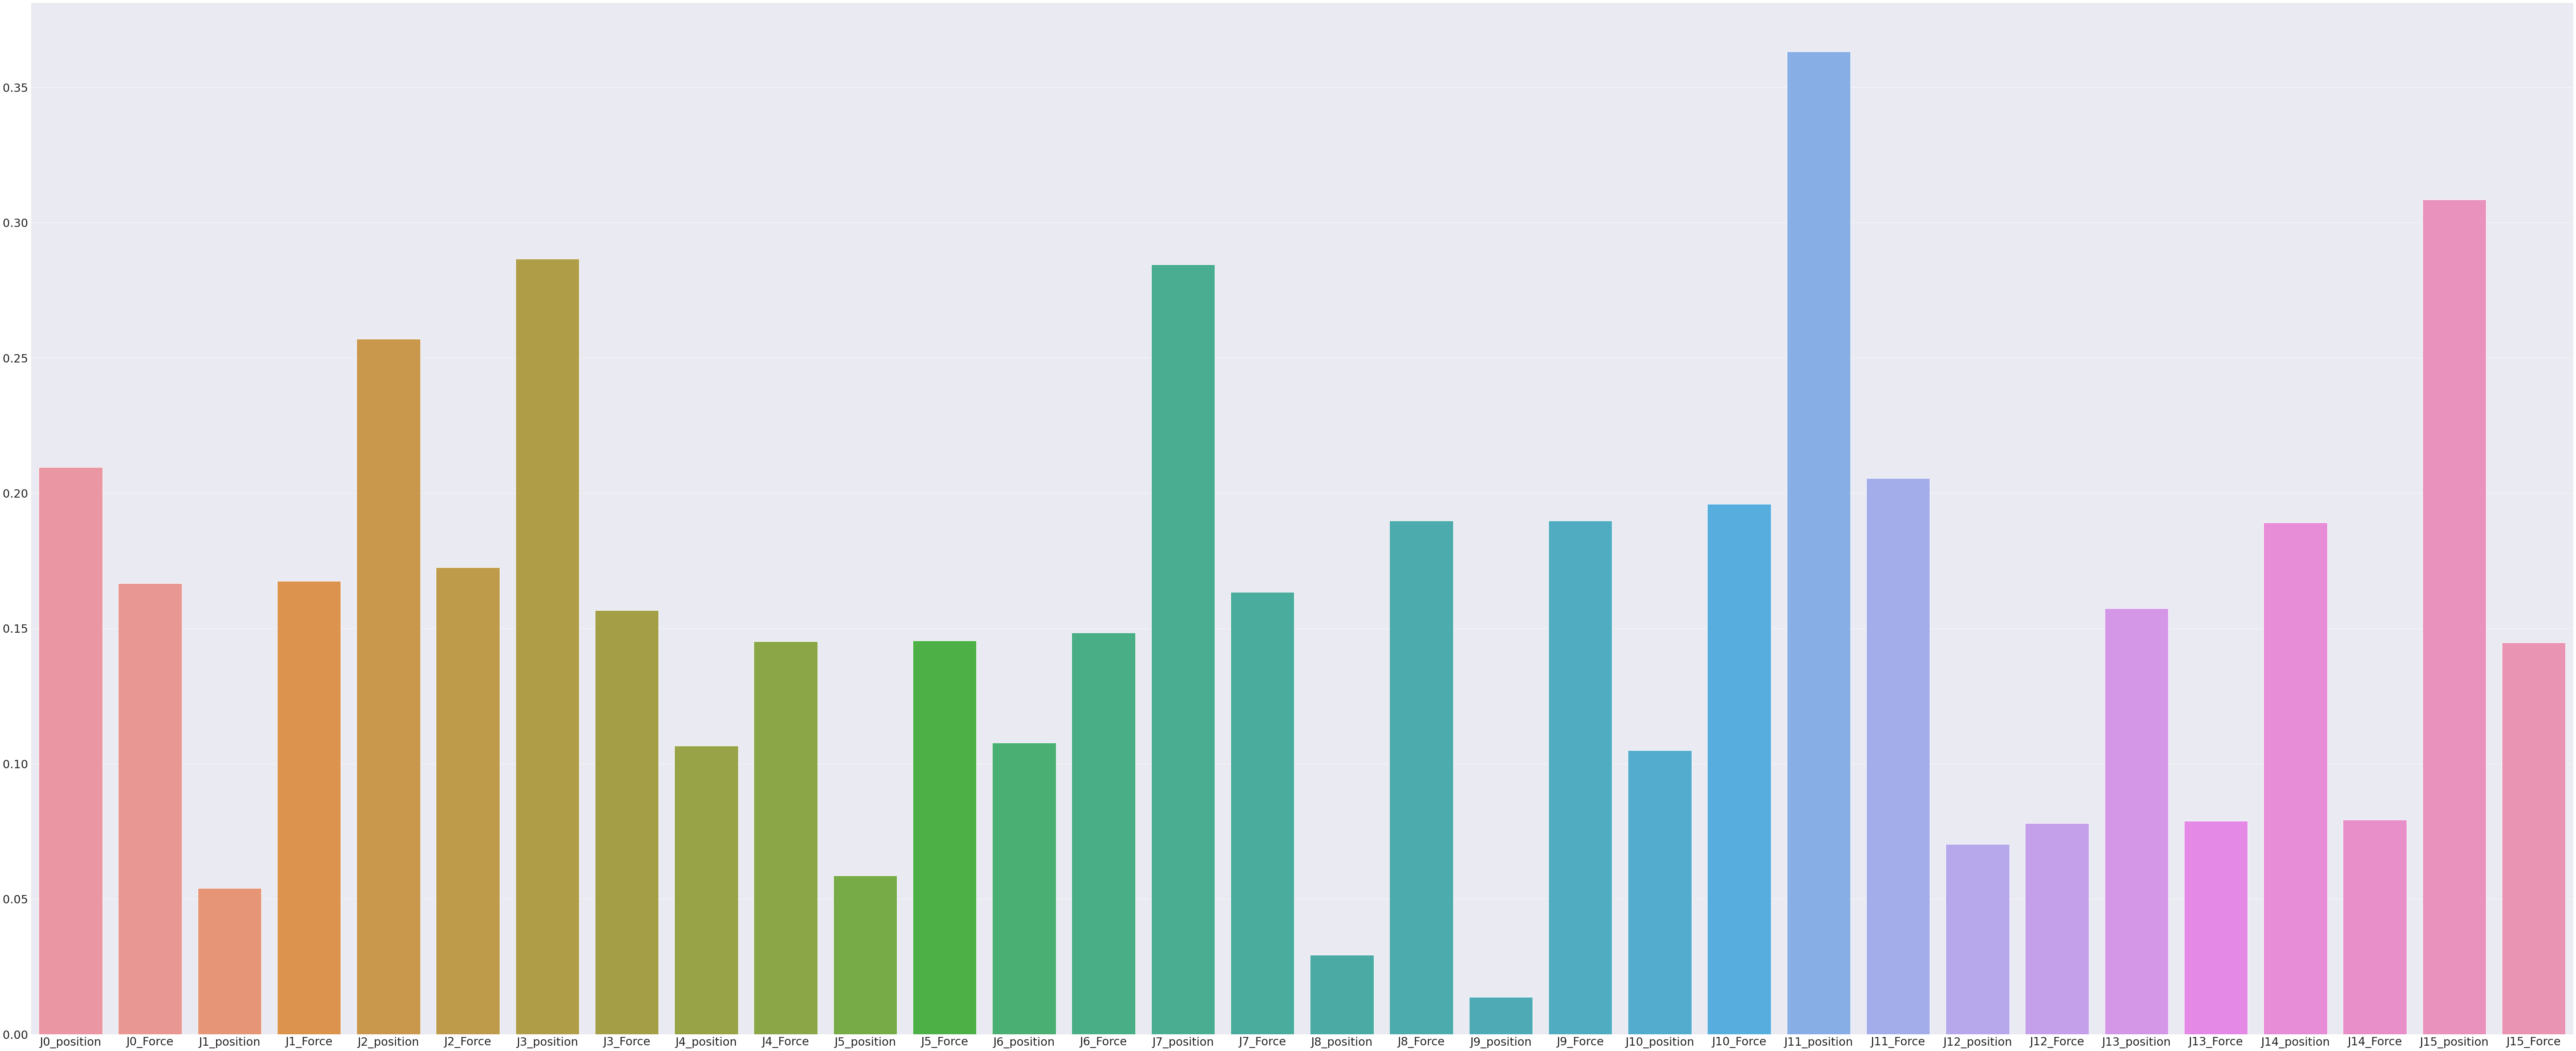

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


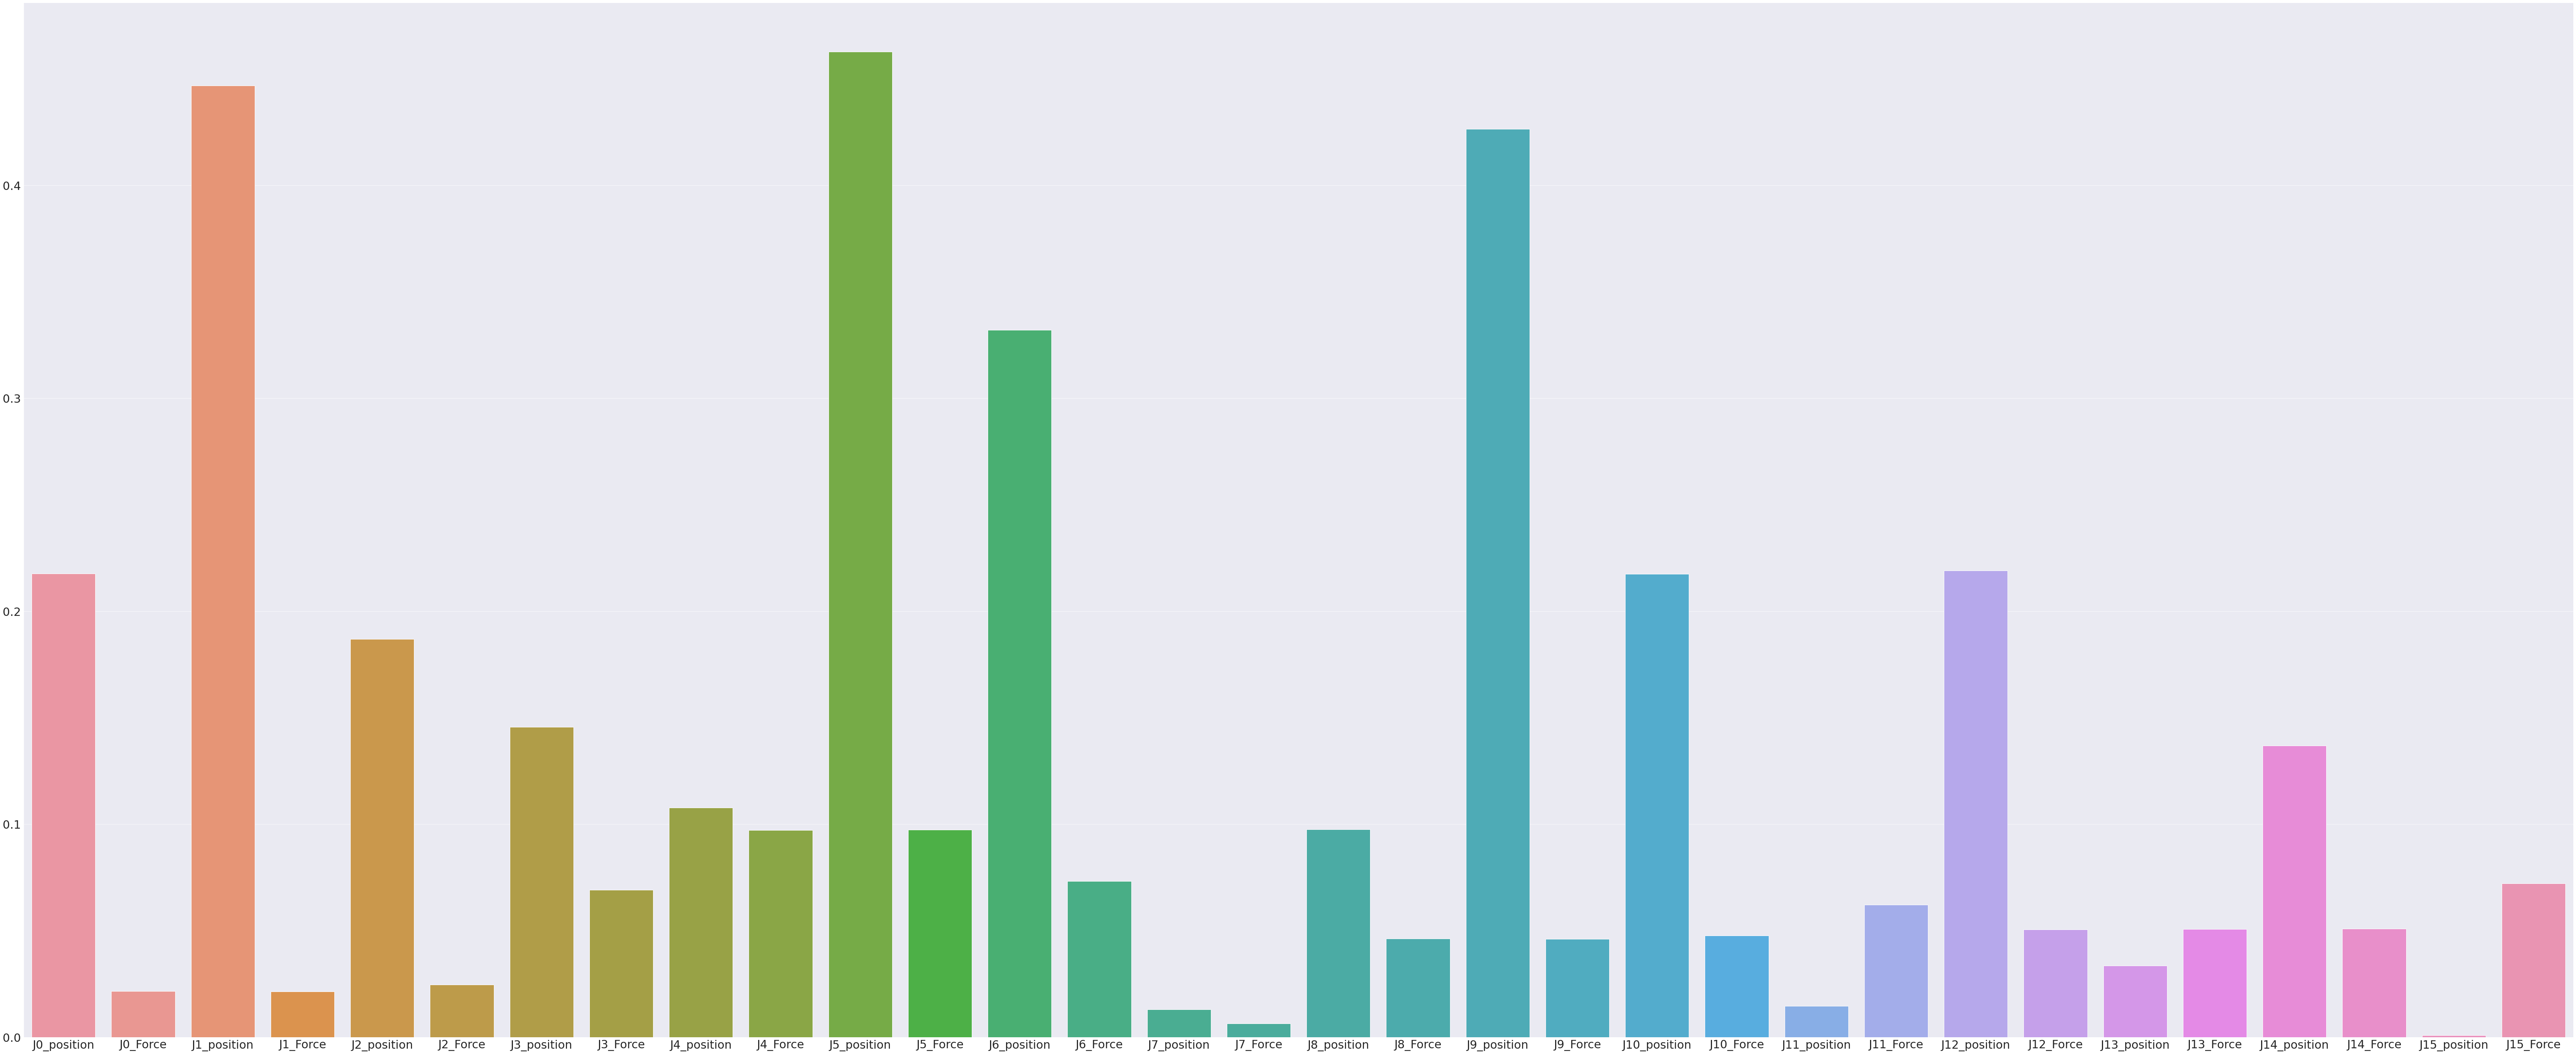

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


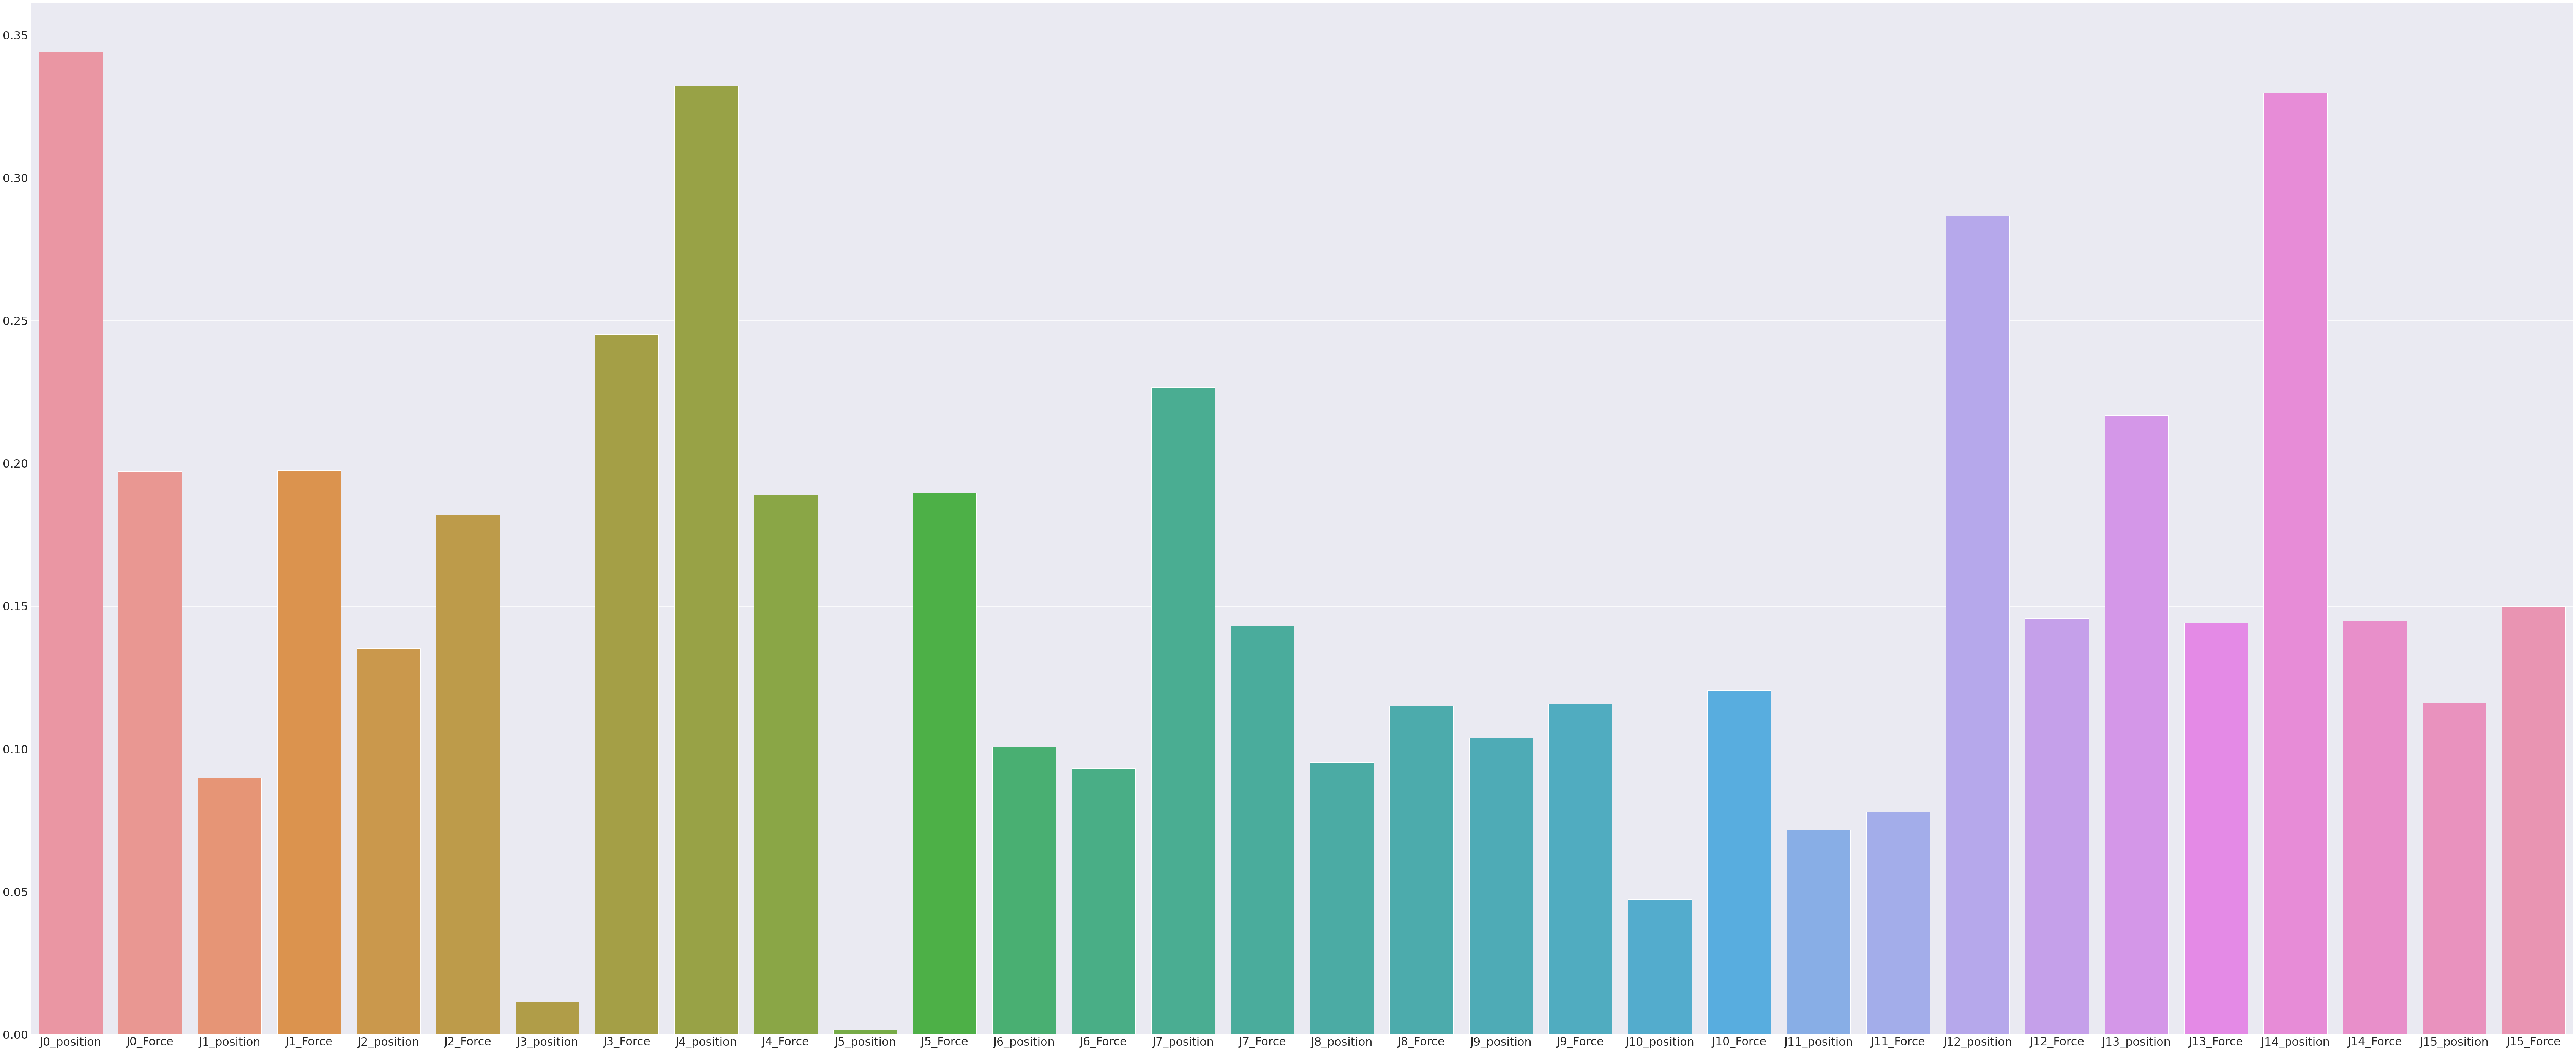

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


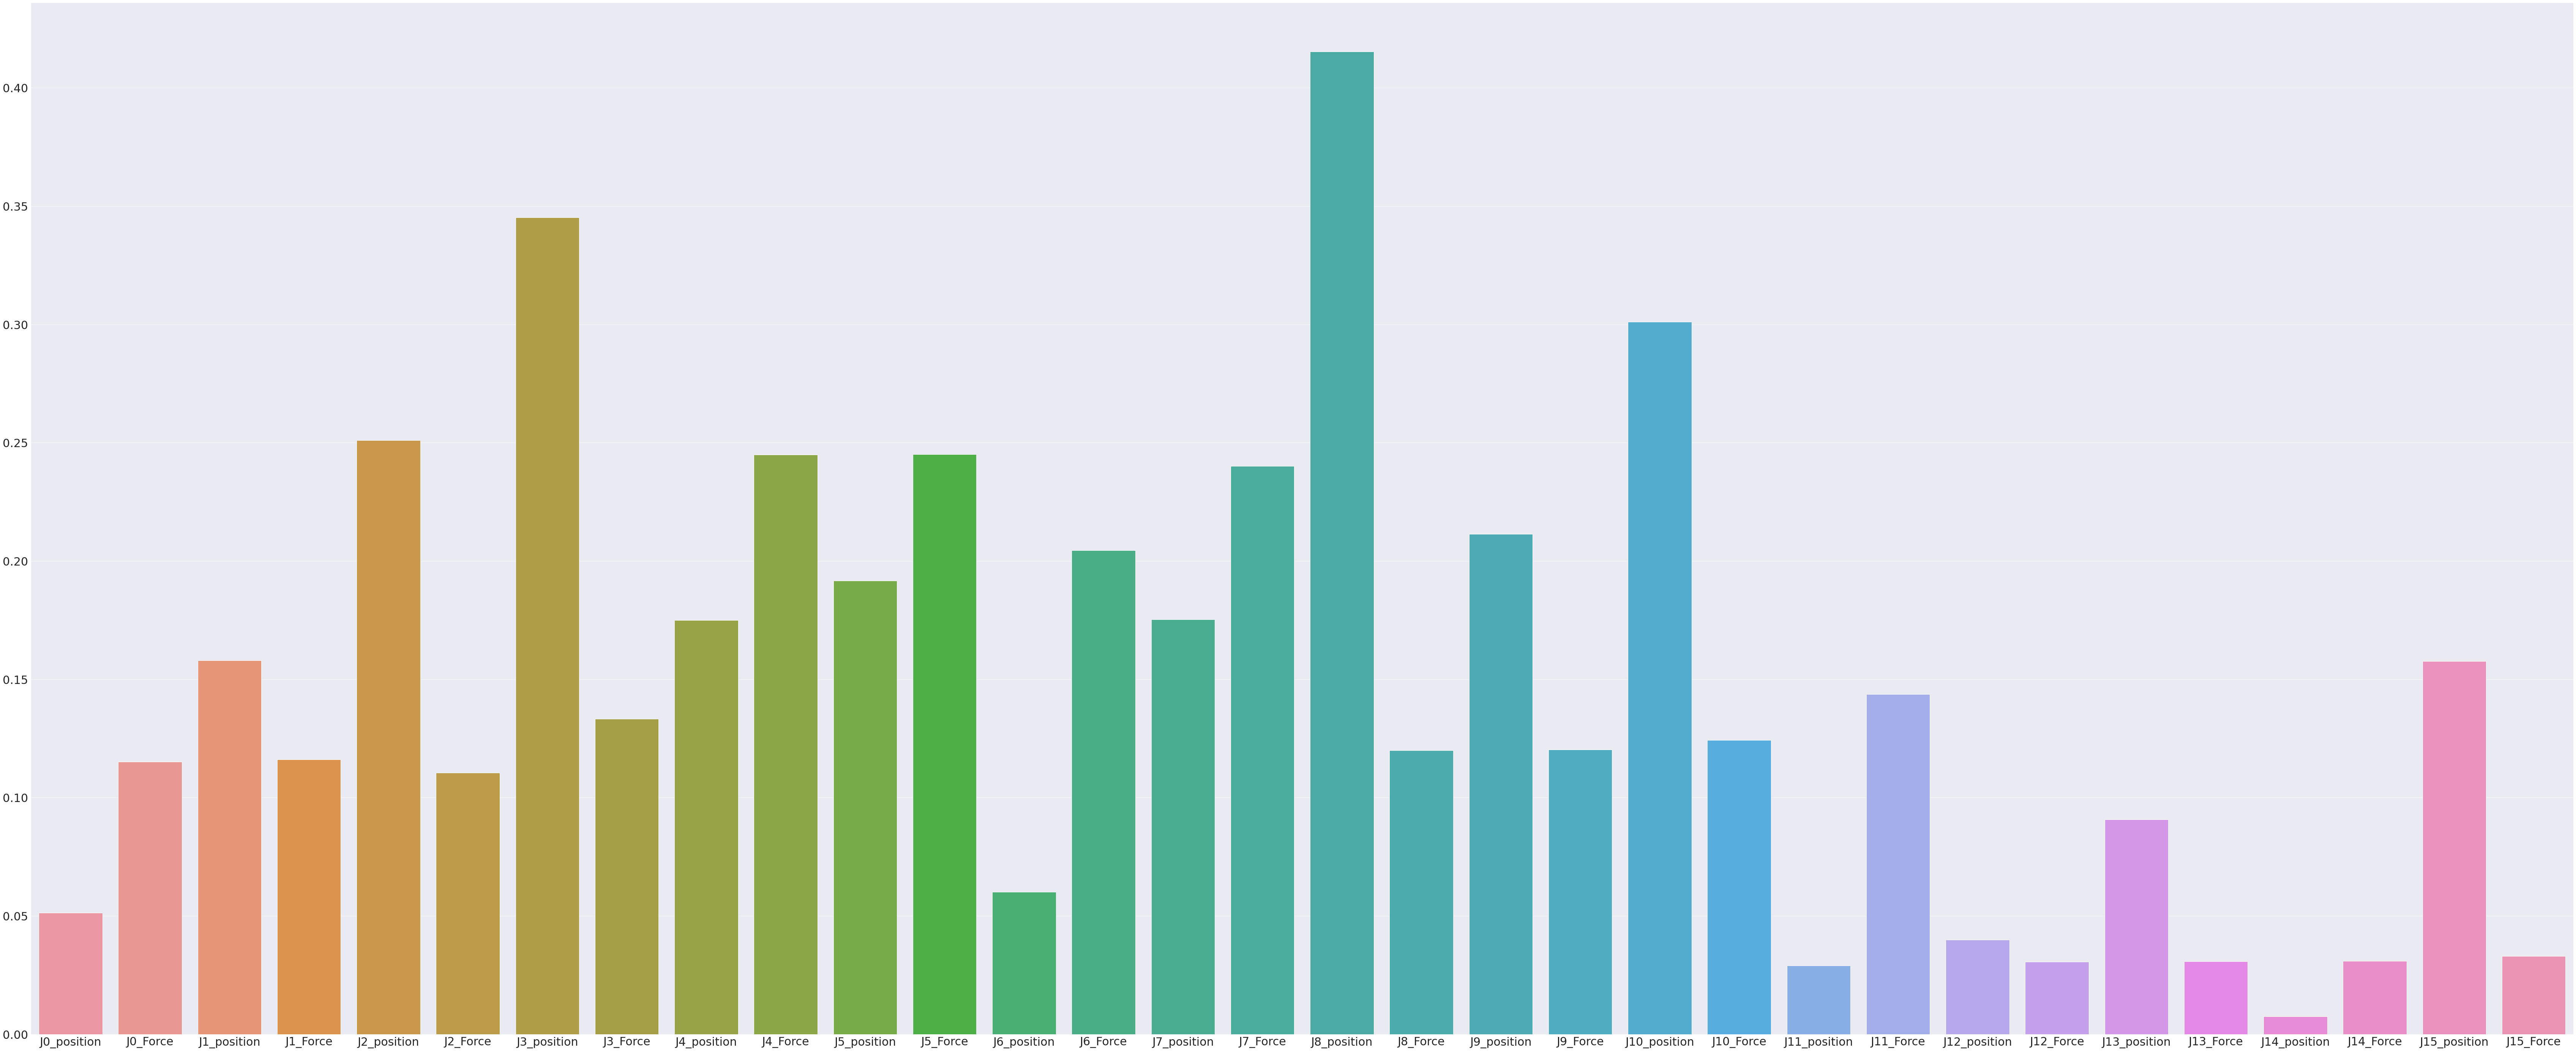

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


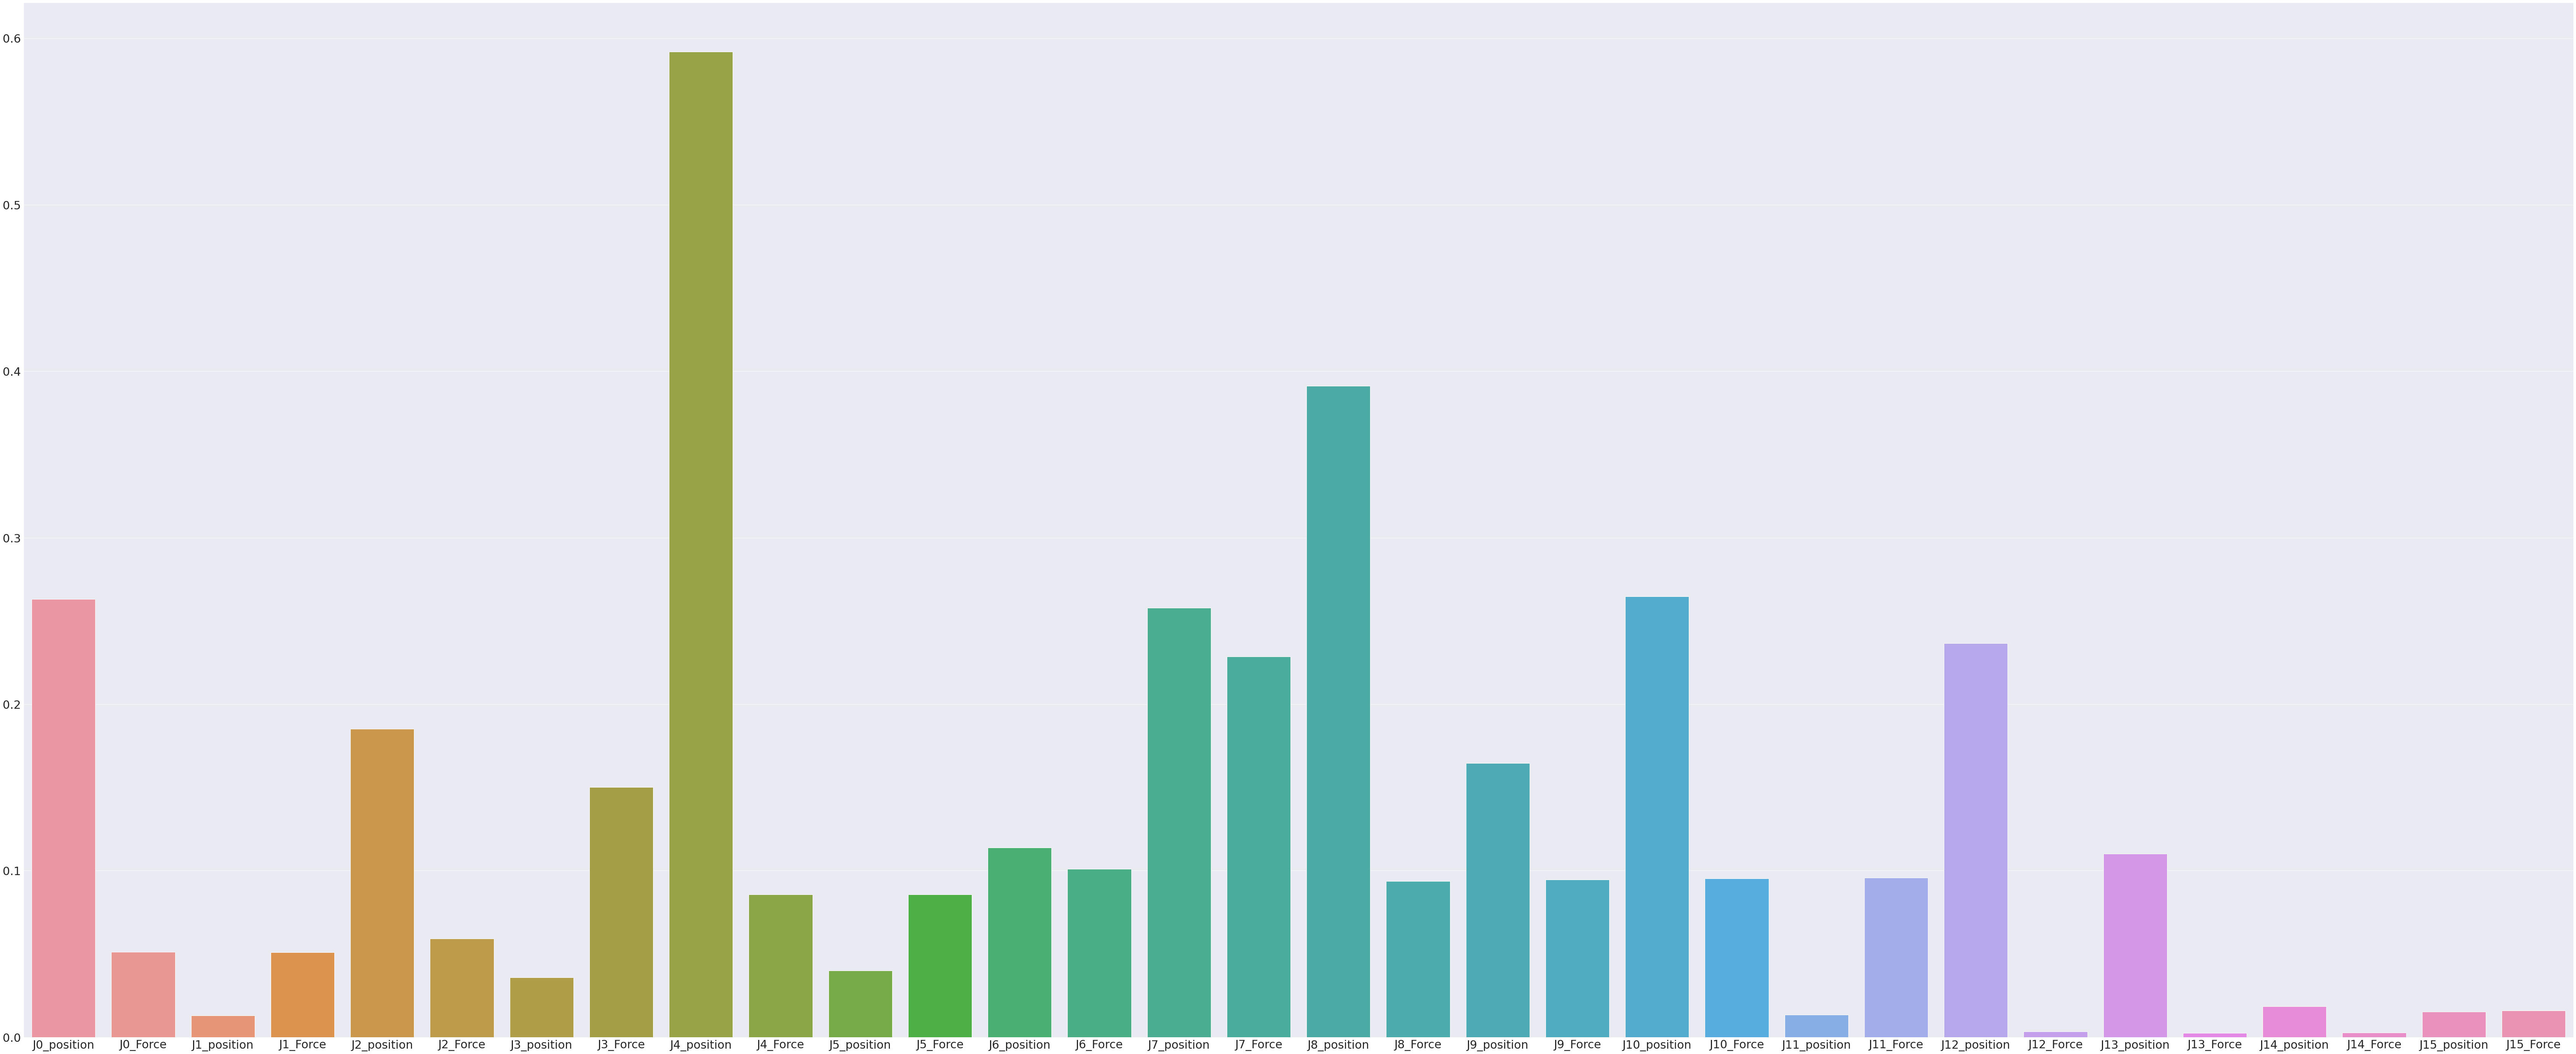

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


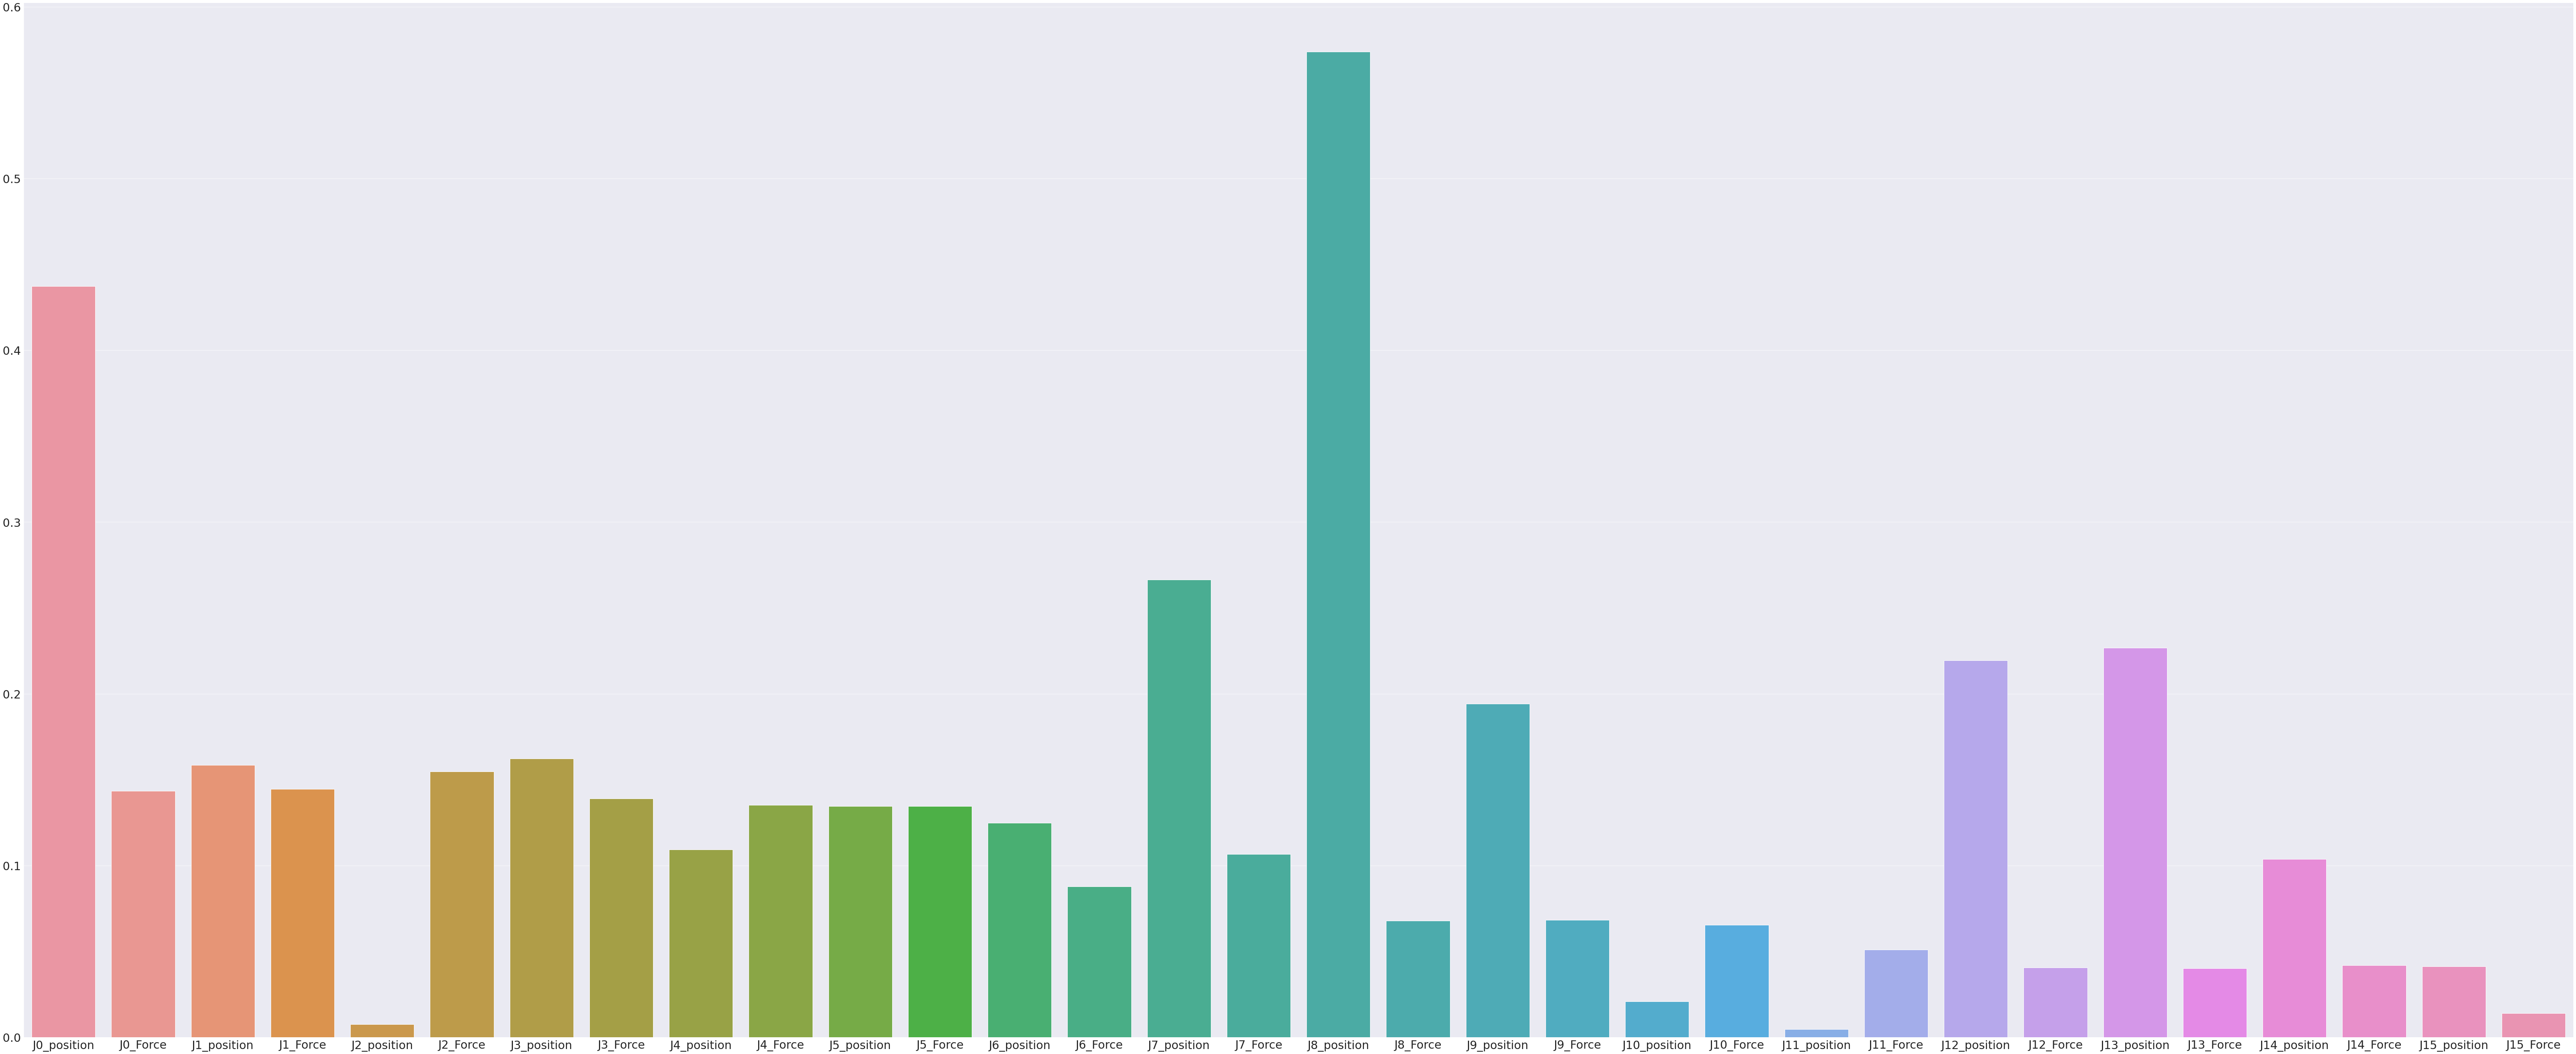

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


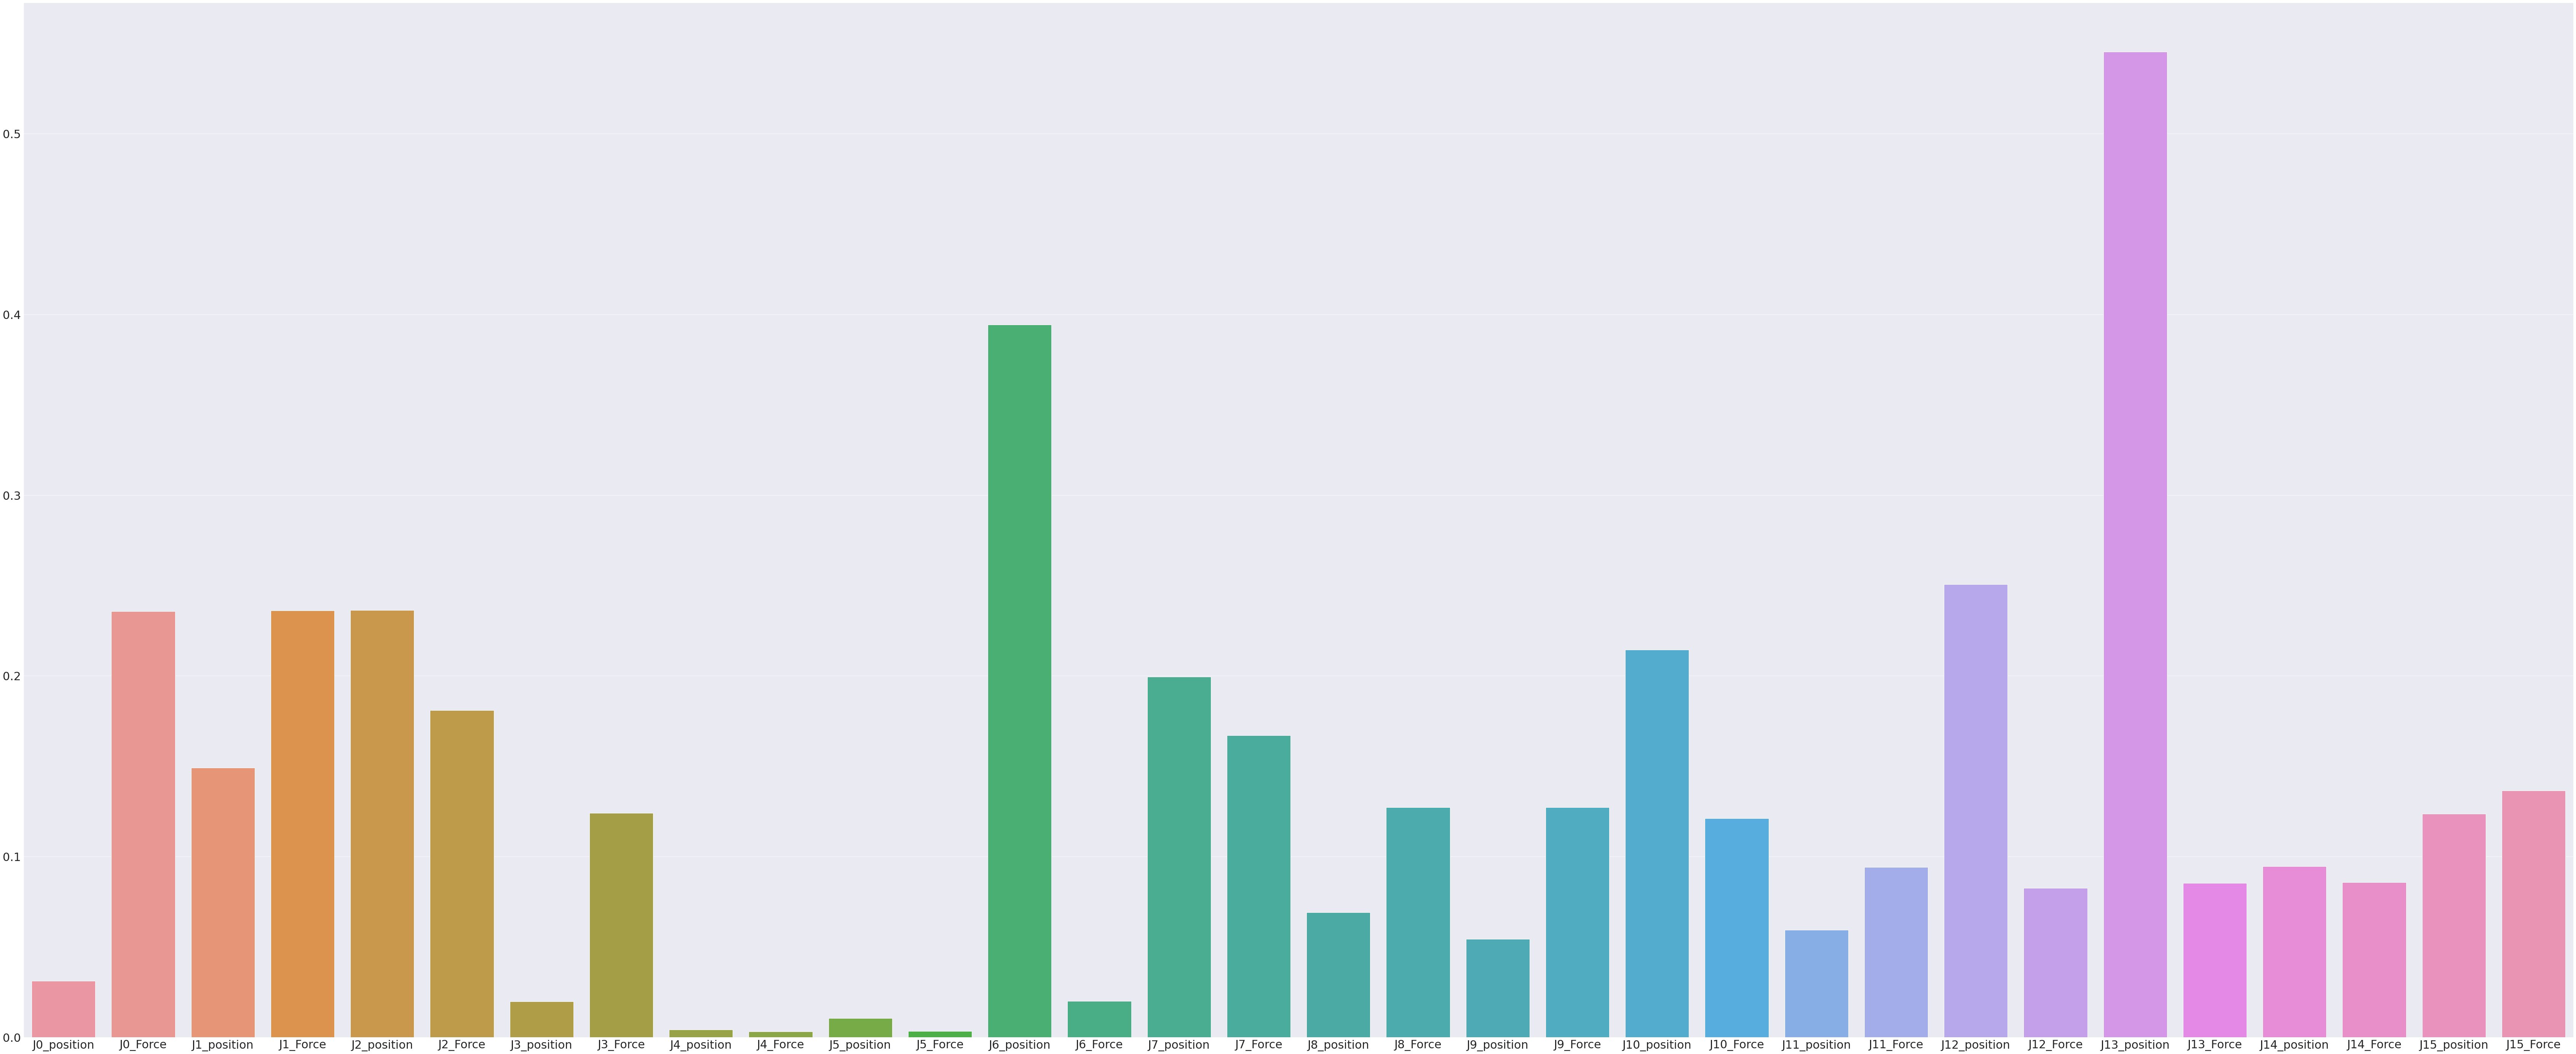

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


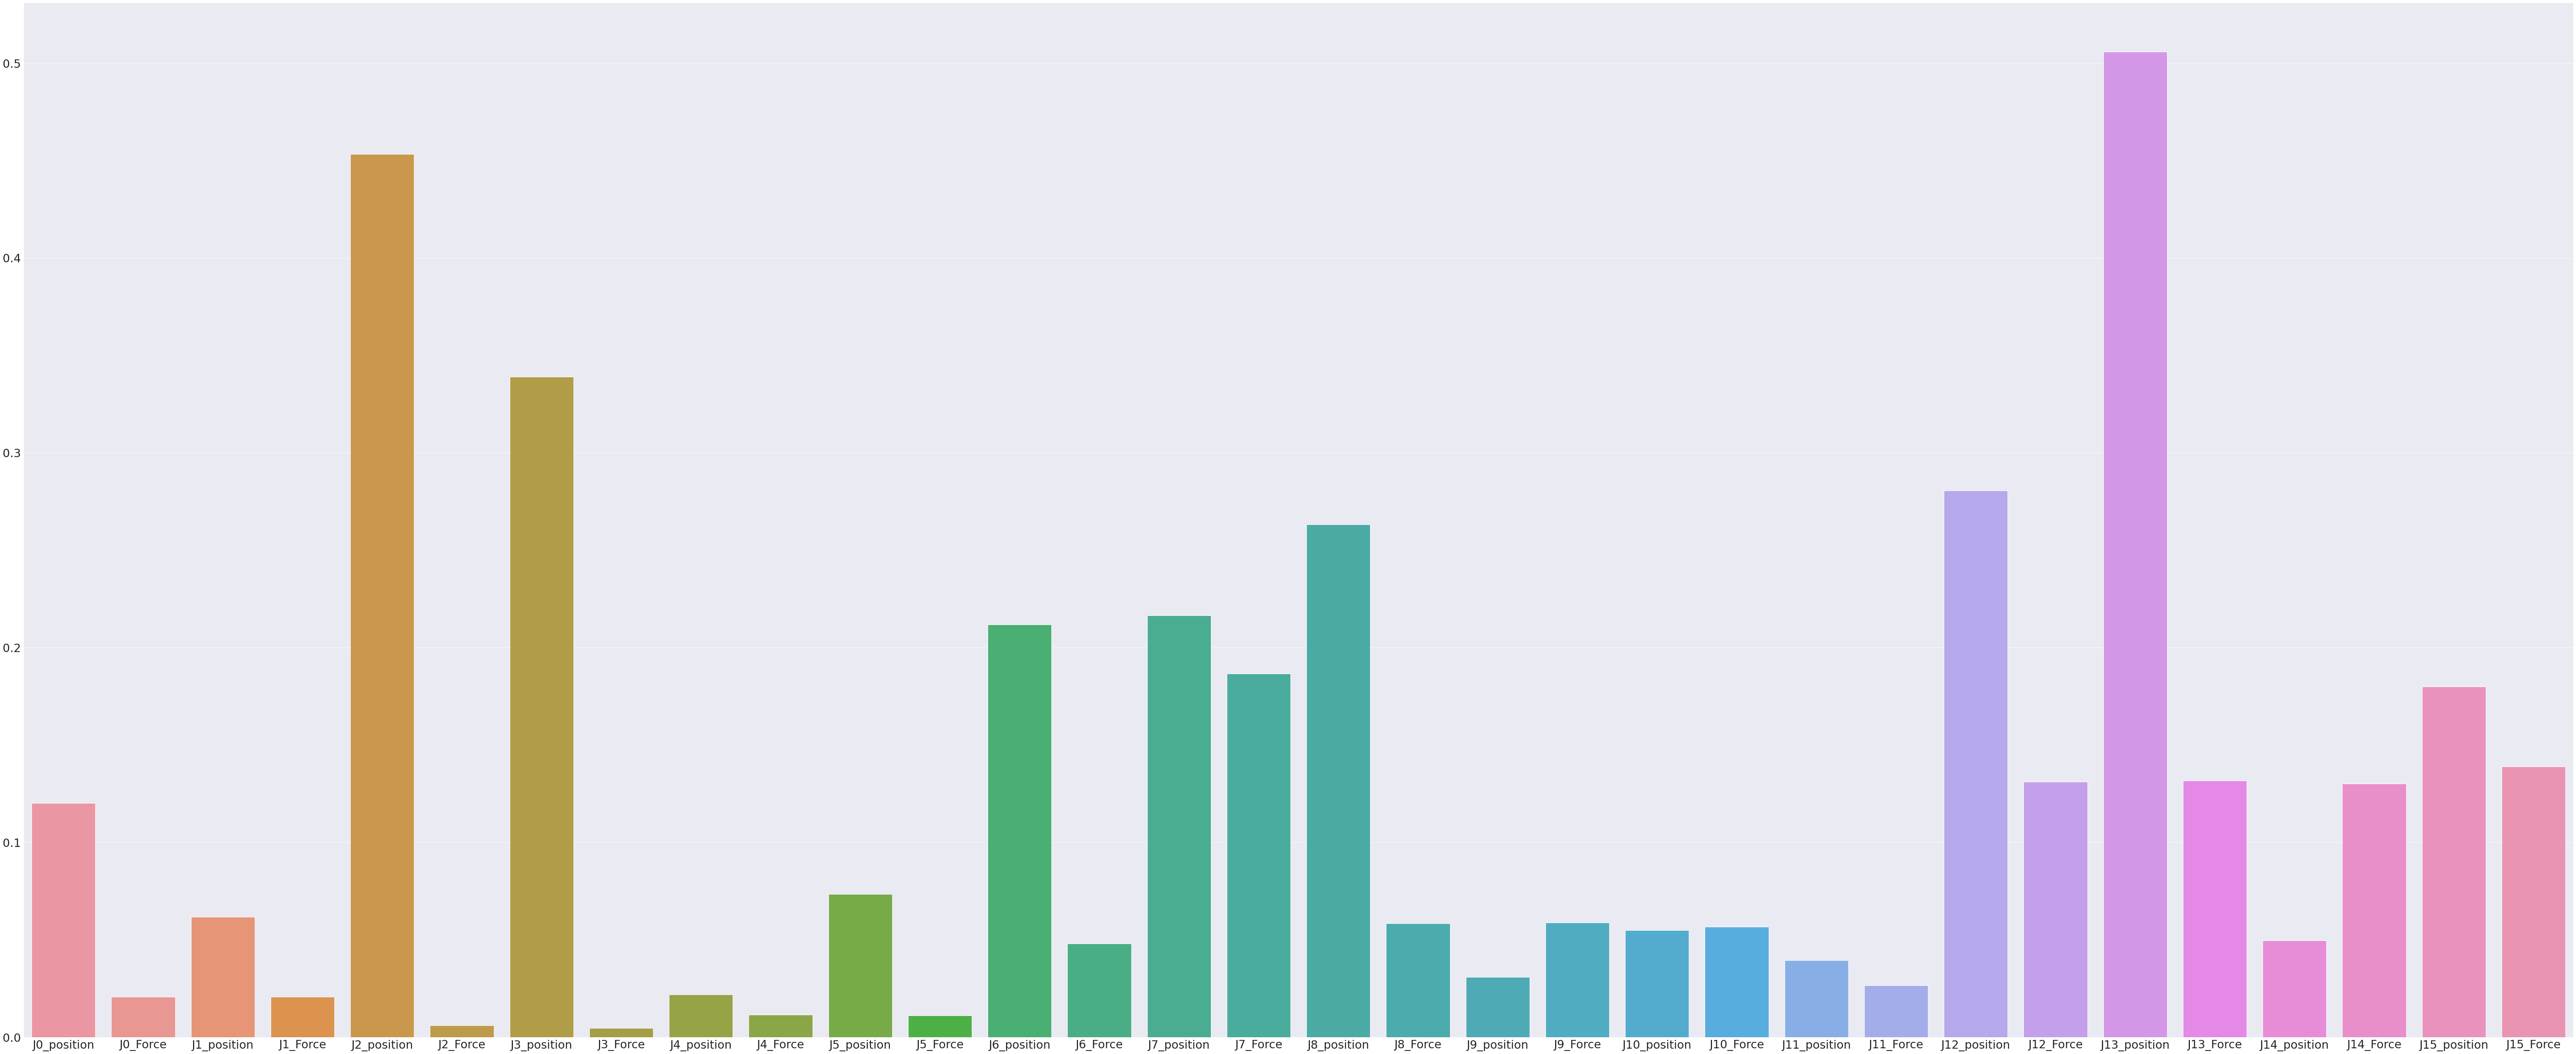

In [ ]:
import seaborn as sns
for i in range(9):
  dlf= pd.DataFrame({"data": Principal_Components[i]})

  # plotting strip plot with seaborn
  ax = sns.barplot(cols, np.abs(Principal_Components[i]))
    
  #size
  plt.rcParams["figure.figsize"] = (120,50)
  ax.tick_params(labelsize=30)

  plt.show()

In [ ]:
k1= pd.DataFrame()

In [ ]:
for i in range(6):
  k1=k1.append(pd.DataFrame(np.abs(Principal_Components[i])).T)

In [ ]:
k1

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.039452,0.226960,0.040932,0.226578,0.029394,0.233756,0.084913,0.212202,0.074964,0.207513,...,0.132452,0.232322,0.075103,0.257366,0.084517,0.257310,0.163356,0.257204,0.164287,0.236078
0,0.209517,0.166669,0.053934,0.167439,0.257024,0.172513,0.286618,0.156601,0.106608,0.145169,...,0.363131,0.205508,0.070321,0.077899,0.157362,0.078752,0.189014,0.079239,0.308440,0.144706
0,0.217661,0.021561,0.446846,0.021492,0.186991,0.024660,0.145568,0.069195,0.107680,0.097202,...,0.014629,0.062083,0.219077,0.050523,0.033490,0.050722,0.136831,0.050959,0.000851,0.072140
0,0.344155,0.197174,0.089868,0.197577,0.135190,0.182030,0.011247,0.245083,0.332251,0.188933,...,0.071675,0.077850,0.286796,0.145663,0.216801,0.144085,0.329770,0.144700,0.116127,0.149956
0,0.051269,0.115111,0.158014,0.116157,0.250951,0.110571,0.345242,0.133215,0.174902,0.244999,...,0.028925,0.143702,0.039869,0.030593,0.090773,0.030799,0.007442,0.030906,0.157615,0.033079
0,0.263079,0.051239,0.013046,0.050828,0.185229,0.059169,0.035795,0.150256,0.591841,0.085669,...,0.013386,0.095778,0.236666,0.003474,0.110236,0.002516,0.018510,0.002674,0.015298,0.015907


In [ ]:
k1.reset_index(inplace= True)
k1= k1.drop('index',axis=1)

In [ ]:
k1.columns= col

In [ ]:
k1=k1.T

In [ ]:
b1=["PC"+str(i) for i in range(1,7)]

In [ ]:
k1.columns =b1

In [ ]:
k1

,PC1,PC2,PC3,PC4,PC5,PC6
J0_position,0.039452,0.209517,0.217661,0.344155,0.051269,0.263079
J0_Force,0.226960,0.166669,0.021561,0.197174,0.115111,0.051239
J1_position,0.040932,0.053934,0.446846,0.089868,0.158014,0.013046
J1_Force,0.226578,0.167439,0.021492,0.197577,0.116157,0.050828
J2_position,0.029394,0.257024,0.186991,0.135190,0.250951,0.185229
J2_Force,0.233756,0.172513,0.024660,0.182030,0.110571,0.059169
J3_position,0.084913,0.286618,0.145568,0.011247,0.345242,0.035795
J3_Force,0.212202,0.156601,0.069195,0.245083,0.133215,0.150256
J4_position,0.074964,0.106608,0.107680,0.332251,0.174902,0.591841
J4_Force,0.207513,0.145169,0.097202,0.188933,0.244999,0.085669


In [ ]:
# k1.to_csv('/content/drive/MyDrive/Shape Detection MEC/Other new data/heatmap.csv')

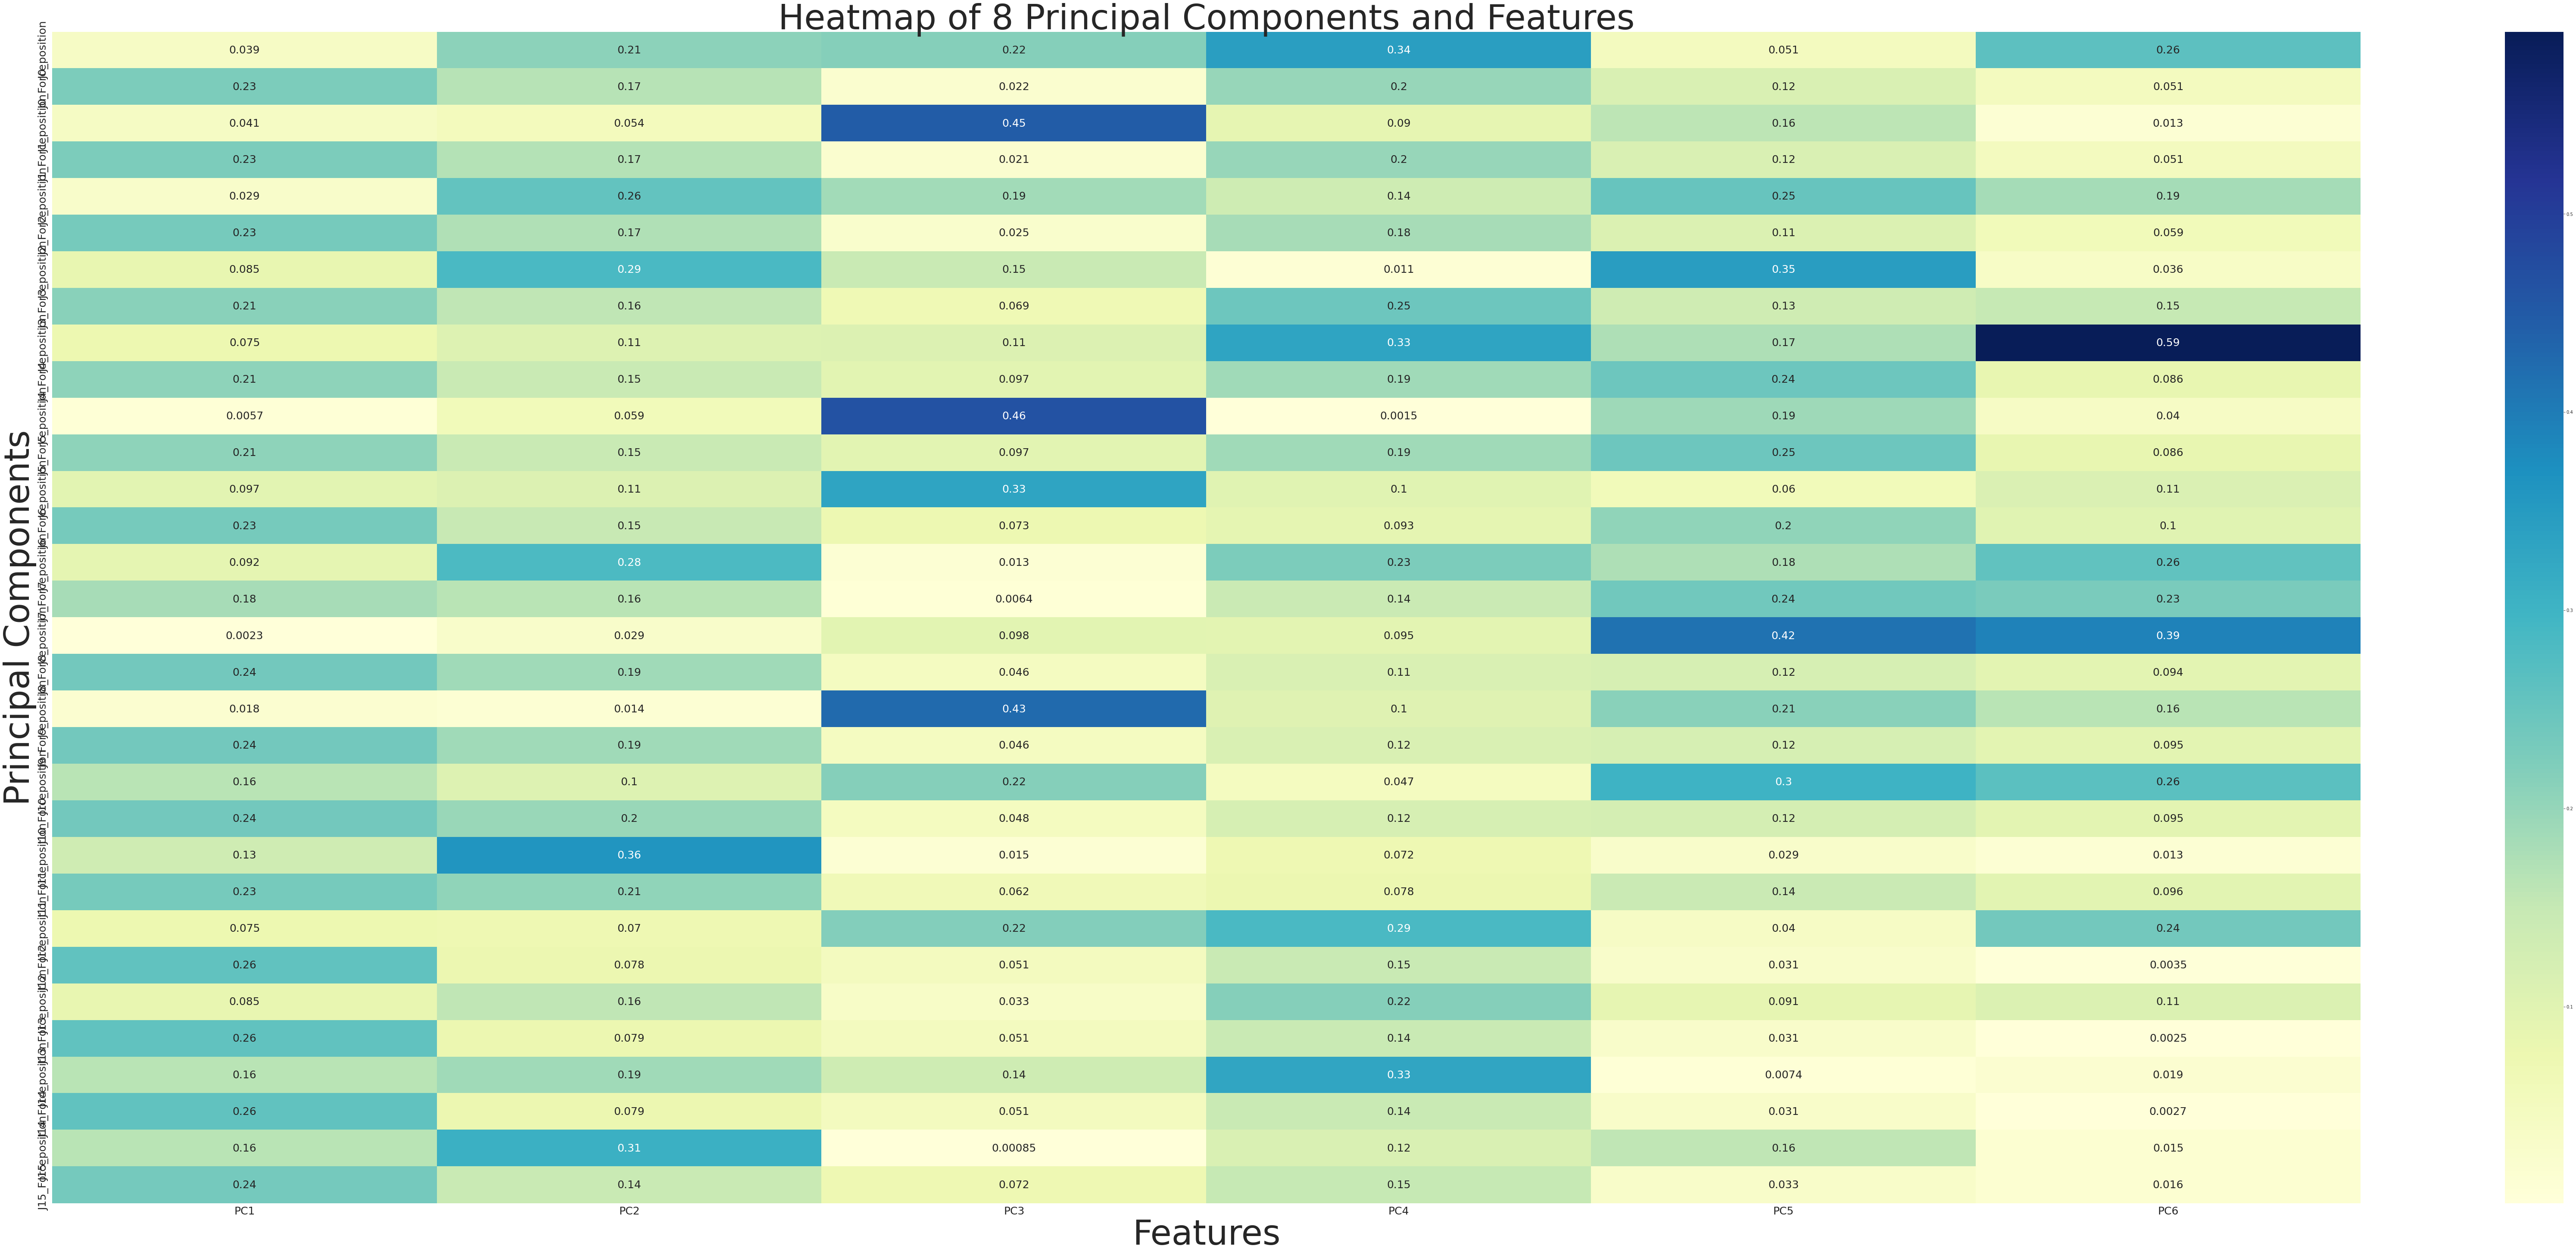

In [ ]:
# plotting correlation heatmap
dataplot = sns.heatmap(k1, cmap="YlGnBu", annot=True,annot_kws={'size': 25})
plt.tick_params(labelsize=25)

plt.xlabel("Features", size=80)
plt.ylabel("Principal Components", size=80)
plt.title("Heatmap of 8 Principal Components and Features", size=80)
plt.savefig( "heatmap.png")
# displaying heatmap
plt.show()

## Permutation Test on PCA

In [ ]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.126947,-0.562268,-0.515280,-0.561416,0.785192,-0.581983,-0.847971,-0.553613,-0.489566,-0.262191,...,-0.439342,-0.747087,-0.620675,-0.582503,-0.503270,-0.583324,0.323843,-0.582948,-0.410072,-0.474322
1,0.109226,-0.564014,-0.486235,-0.563148,0.784650,-0.583757,-0.907642,-0.555421,-0.530782,-0.266571,...,-0.258460,-0.792459,-0.591737,-0.597332,-0.535864,-0.598245,0.316344,-0.597948,-0.491556,-0.489767
2,0.122141,1.156392,-0.801959,1.160350,-0.191684,1.291403,-1.383621,1.503497,-0.103550,-0.142417,...,0.217673,0.558882,0.076288,0.713056,0.727023,0.716115,-0.361529,0.717445,-0.211342,0.841302
3,3.400113,1.341005,-0.346889,1.344997,0.176784,1.490326,0.927373,0.358038,5.117992,-0.240829,...,0.435175,0.667377,-0.110431,0.583280,0.534898,0.585659,-0.913194,0.586866,1.148562,0.125557
4,0.585515,1.680230,-0.940874,1.684738,-1.855215,1.664254,0.834673,1.816048,0.295147,0.307386,...,0.541220,0.181909,0.732986,0.278482,-1.028222,0.279941,0.224626,0.280781,-0.390110,0.398974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129995,1.302205,0.336523,0.087962,0.330270,-0.150542,0.345036,0.905631,0.496680,1.530970,0.875387,...,0.938433,0.942735,-0.441111,0.728301,1.107265,0.733492,-1.464363,0.733145,1.047963,0.847648
129996,-0.080012,-0.843610,1.879305,-0.843195,-1.441795,-0.887998,-0.408124,-0.886611,-0.315193,-0.404786,...,-1.274481,-0.891892,0.231353,-0.768980,-0.686034,-0.770477,1.162926,-0.770692,-1.549366,-0.666183
129997,-0.242266,-1.040040,-0.164071,-1.041356,0.404528,-1.111989,-0.173584,-1.137537,-0.509462,-0.616202,...,-1.044675,-0.883963,0.870786,-1.042323,-0.491965,-1.045181,1.619986,-1.045907,-0.692394,-0.945572
129998,0.003834,-0.694359,-1.115037,-0.693152,-1.066430,-0.721840,-0.483207,-0.702756,-0.261255,-0.569721,...,0.025068,-0.490452,0.587054,-0.543051,0.398067,-0.543769,0.272391,-0.543788,-0.289931,-0.436517


In [ ]:
def de_correlate_df(X_train):
    X_aux = X_train.copy()
    for col in X_train.columns:
        X_aux[col] = X_train[col].sample(len(X_train)).values
        
    return X_aux

In [ ]:
pca = PCA()
pca.fit(X_train)
original_variance = pca.explained_variance_ratio_

In [ ]:
N_permutations = 1000
variance = np.zeros((N_permutations, len(X_train.columns)))

In [ ]:
for i in range(N_permutations):
    X_aux = de_correlate_df(X_train)
    
    pca.fit(X_aux)
    variance[i, :] = pca.explained_variance_ratio_

In [ ]:
x=[f'PC{i+1}' for i in range(len(X_train.columns))]

In [ ]:
import plotly.graph_objects as go
p_val = np.sum(variance > original_variance, axis=0) / N_permutations
fig = go.Figure()
fig.add_trace(go.Scatter(x=[f'PC{i+1}' for i in range(len(X_train.columns))], y=p_val, name='p-value on significance',line=dict(width=5)))
fig.update_layout(title="PCA Permutation Test p-values")


In [ ]:
p_val= pd.DataFrame(p_val)

In [ ]:
p_val

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,1.0
7,1.0
8,1.0
9,1.0


In [ ]:
l1=["PC{}".format(i+1) for i in range(32)]

In [ ]:
# p_val.to_csv('/content/drive/MyDrive/Shape Detection MEC/Other new data/PCA_permutationTest.csv')

<function matplotlib.pyplot.show(*args, **kw)>

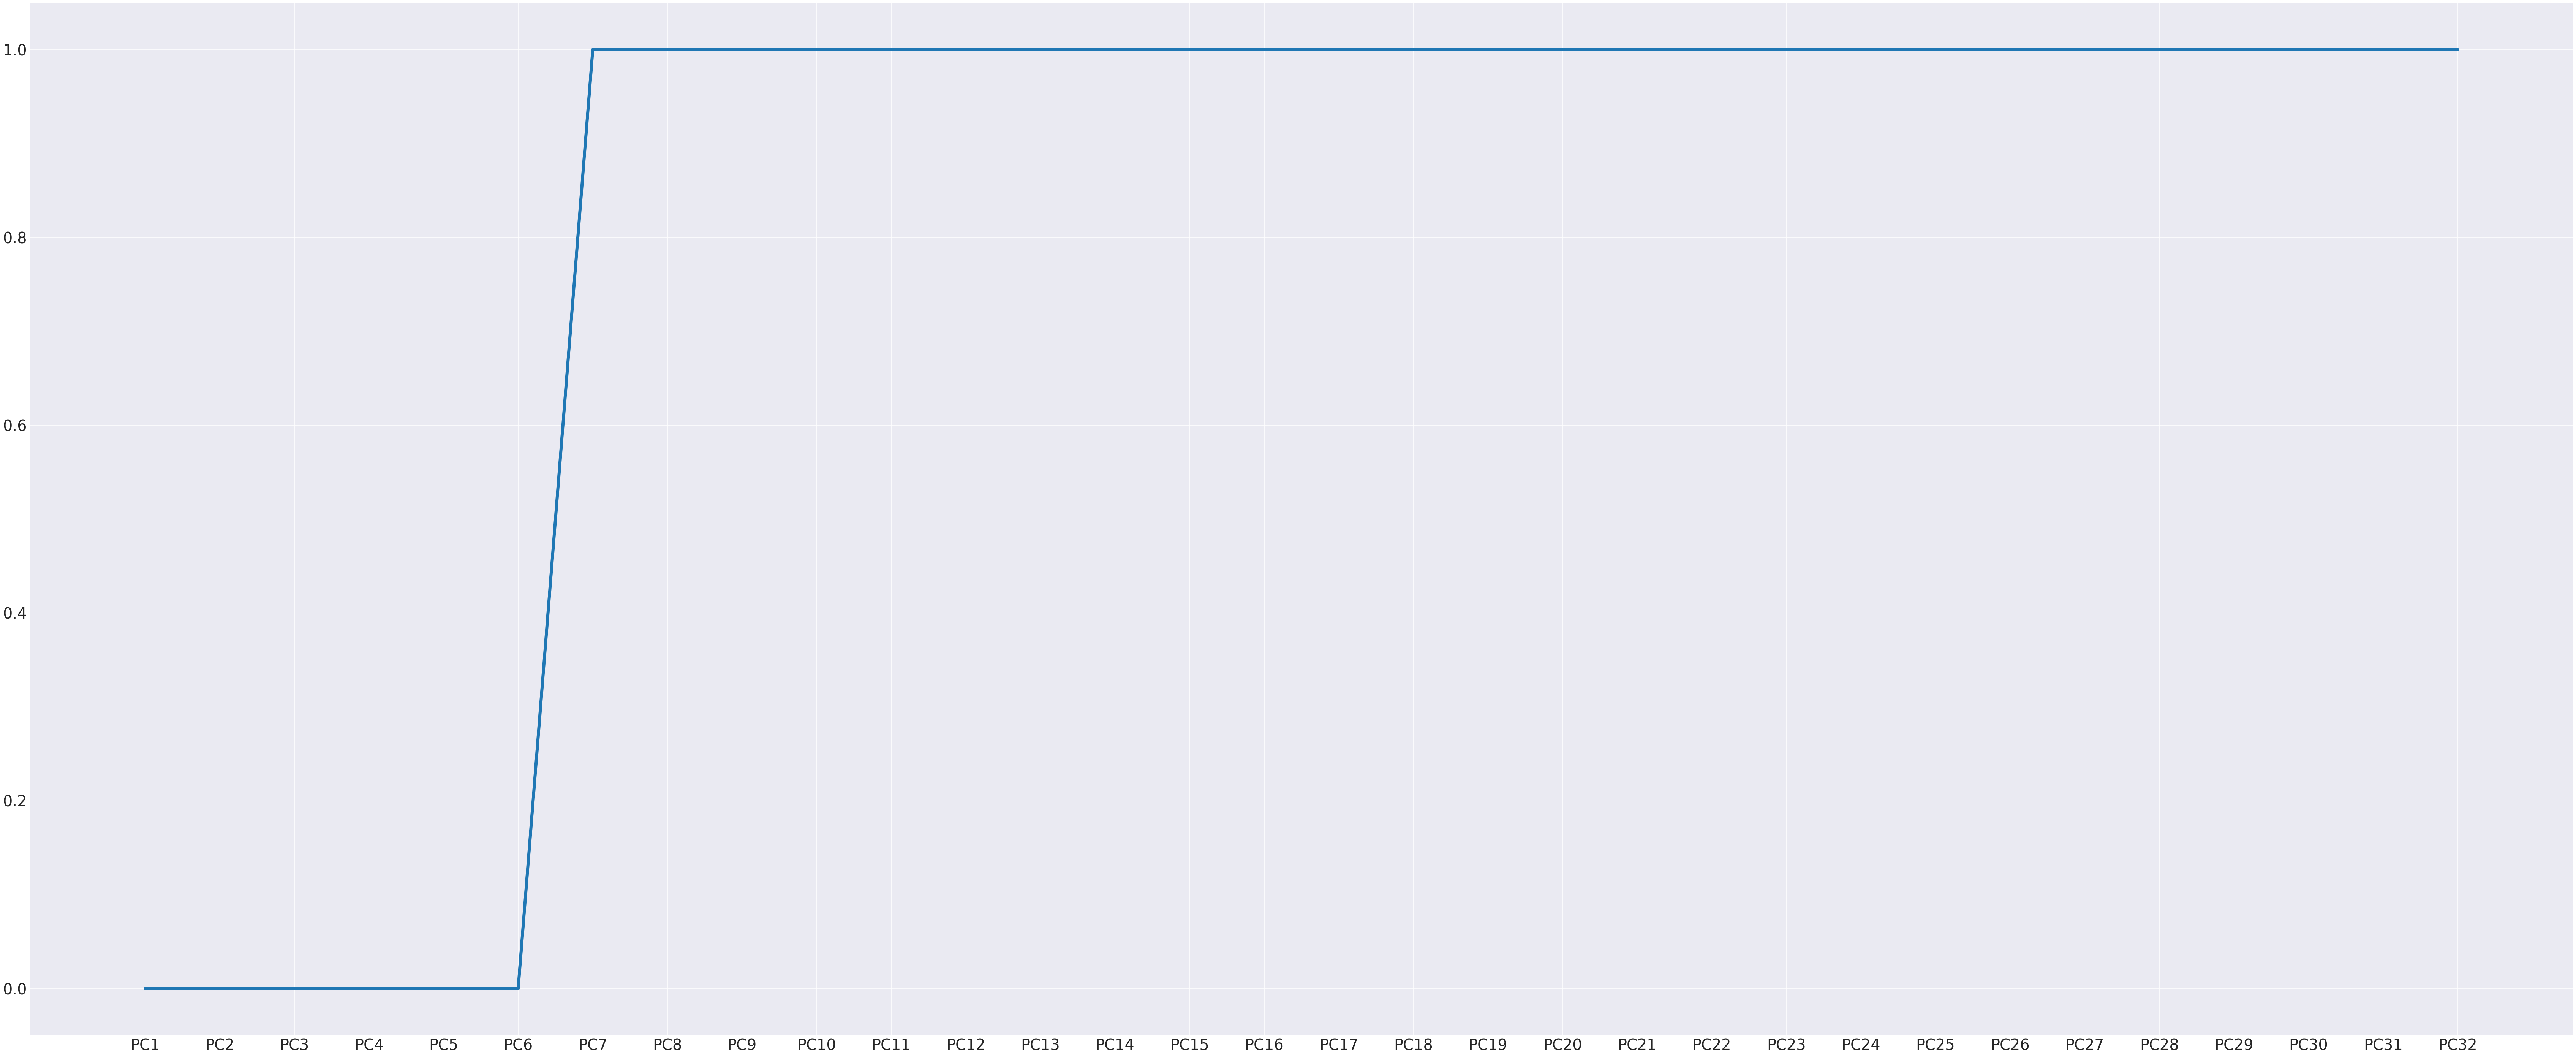

In [ ]:
plt.plot(x,p_val[0],linewidth=8)
plt.grid(True)
plt.rcParams["figure.figsize"] = (80,30)
plt.tick_params(labelsize=40)
plt.savefig( "pvalues_pca.png")
plt.show

In [ ]:
# X3=principalDf[['PC1','PC2']]

In [ ]:
# X4= X1_new.join(y_train)

In [ ]:
# X4

In [ ]:
# fig = px.scatter_matrix(
#     X4,
#     dimensions=X1_new.columns,
#     color="Object_Held"
# )
# fig.update_traces(diagonal_visible=False)
# fig.show()

## CLUSTERING

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.cm as cm

In [ ]:
X1_new=principalDf[['PC1','PC2','PC3','PC4','PC5','PC6']]

In [ ]:
X1_new

,PC1,PC2,PC3,PC4,PC5,PC6
0,-2.195944,-0.044956,0.645625,-0.434757,0.405049,1.317086
1,-2.278252,-0.046328,0.646515,-0.443495,0.410900,1.375538
2,2.570662,0.807569,0.018607,-1.029670,-2.265708,0.461862
3,3.046781,0.255259,1.202041,-4.072491,0.913577,-5.116489
4,2.427606,1.848691,0.393017,-1.492279,-0.635315,0.703020
...,...,...,...,...,...,...
129995,4.110044,-0.427118,-0.367884,-1.172742,0.917106,-0.772265
129996,-3.427540,1.682140,-3.227939,1.187623,0.656710,-0.318615
129997,-4.445164,0.425766,0.181569,0.579550,0.089520,0.566268
129998,-2.211700,-0.338412,1.312817,-0.137541,-1.665933,-0.174784


In [ ]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
count,1.300000e+05,1.300000e+05,1.300000e+05,1.300000e+05,1.300000e+05,1.300000e+05,1.300000e+05,1.300000e+05,1.300000e+05,1.300000e+05,...,1.300000e+05,1.300000e+05,1.300000e+05,1.300000e+05,1.300000e+05,1.300000e+05,1.300000e+05,1.300000e+05,1.300000e+05,1.300000e+05
mean,-1.136868e-17,-1.563194e-17,-1.337733e-17,-1.923931e-17,2.448640e-17,-3.410605e-17,-1.902068e-17,-2.268271e-17,2.011383e-17,1.060348e-17,...,2.656337e-17,2.426777e-17,-2.186285e-18,2.721925e-17,-2.066040e-17,1.093143e-17,-1.913000e-17,5.902970e-18,1.896603e-17,-8.417199e-18
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,...,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-4.604859e+00,-1.247216e+00,-2.246216e+00,-1.251454e+00,-6.351641e+00,-1.306847e+00,-3.195942e+00,-1.298753e+00,-4.675939e+00,-7.139183e-01,...,-3.114190e+00,-9.757320e-01,-1.274299e+01,-1.103626e+00,-6.421881e+00,-1.104116e+00,-1.842116e+00,-1.102777e+00,-2.434673e+00,-9.977781e-01
25%,-1.657158e-01,-6.754530e-01,-6.698664e-01,-6.742804e-01,-6.189975e-01,-7.039017e-01,-7.819479e-01,-7.269487e-01,-4.419128e-01,-4.874263e-01,...,-6.704101e-01,-7.511401e-01,-1.326093e-01,-6.716037e-01,-5.180342e-01,-6.726211e-01,-1.014070e+00,-6.729623e-01,-7.022994e-01,-6.559631e-01
50%,7.282302e-02,-3.118095e-01,-2.330807e-01,-3.100482e-01,2.306951e-02,-3.103711e-01,2.031495e-01,-2.805776e-01,-1.566478e-01,-2.595144e-01,...,-9.732800e-02,-4.641975e-01,1.026422e-01,-2.934137e-01,5.992789e-03,-2.926050e-01,1.835178e-01,-2.929693e-01,-1.976901e-01,-3.889483e-01
75%,3.546574e-01,5.608703e-01,3.342427e-01,5.580015e-01,7.713326e-01,5.966814e-01,7.021440e-01,5.833175e-01,2.194295e-01,4.284833e-02,...,5.238640e-01,5.051815e-01,5.370502e-01,4.924186e-01,5.390238e-01,4.963240e-01,5.056519e-01,4.960772e-01,7.196048e-01,5.020472e-01
max,5.270756e+00,1.226125e+01,3.526405e+00,1.233704e+01,3.912937e+00,7.002185e+00,3.051407e+00,7.726812e+00,6.085891e+00,6.778684e+01,...,4.532236e+00,1.045332e+01,2.046580e+00,1.295073e+01,7.280052e+00,1.301085e+01,3.772319e+00,1.298571e+01,6.109353e+00,1.319931e+01


In [ ]:
X_train.columns=cols

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y1 = le.fit_transform(y_train)


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
y= pd.DataFrame(y1)

In [ ]:
y.columns=['Object_Held']

In [ ]:
# X= pd.concat([X_train,y],axis=1)

In [ ]:
X= copy.deepcopy(X_train) 

In [ ]:
int((X.shape[0]//2)**0.5)

254

In [ ]:
X1= copy.deepcopy(X1_new)

In [ ]:
# kmeans = KMeans(n_clusters=13, random_state=0)

# kmeans.fit(X1)

# # check how many of the samples were correctly labeled
# # labels = kmeans.labels_

# # correct_labels = sum(y1 == labels)

# pred = kmeans.predict(X1)
# score = silhouette_score(X1, pred)
# print('Silhouette Score for k = 13: {:<.3f}'.format(score))

In [ ]:
from sklearn.cluster import KMeans
cs = []
for i in range(2, 50):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)

In [ ]:
cs

[2955102.5077935564,
 2547798.4642409096,
 2184727.2257964085,
 1926866.1853764935,
 1821872.30219961,
 1691117.5355168905,
 1548506.5460256548,
 1455387.5865227277,
 1374726.2091739308,
 1284566.564412902,
 1190308.7603308512,
 1133089.0790225798,
 1092234.8227627059,
 1053187.6860501012,
 998834.4703113383,
 956472.976831844,
 909659.265012814,
 870398.2877489435,
 819491.6124709577,
 782228.8910555446,
 754922.149916973,
 728983.7949930399,
 694414.844371556,
 684747.5806654738,
 635186.7620300255,
 634830.7399952787,
 599806.7492261939,
 592983.7220829284,
 576071.8753633788,
 563051.7736465279,
 551540.7855813135,
 532317.8268758858,
 532128.299058916,
 515799.1483904111,
 516453.8128953573,
 497151.5181159675,
 491466.5273515654,
 484984.2397919694,
 480080.3191596526,
 465014.79204923974,
 463728.56915058754,
 451228.8402118492,
 450802.4193320307,
 440317.68153159006,
 436709.7075234427,
 432011.7350866261,
 427125.61386029224,
 418775.8859506708]

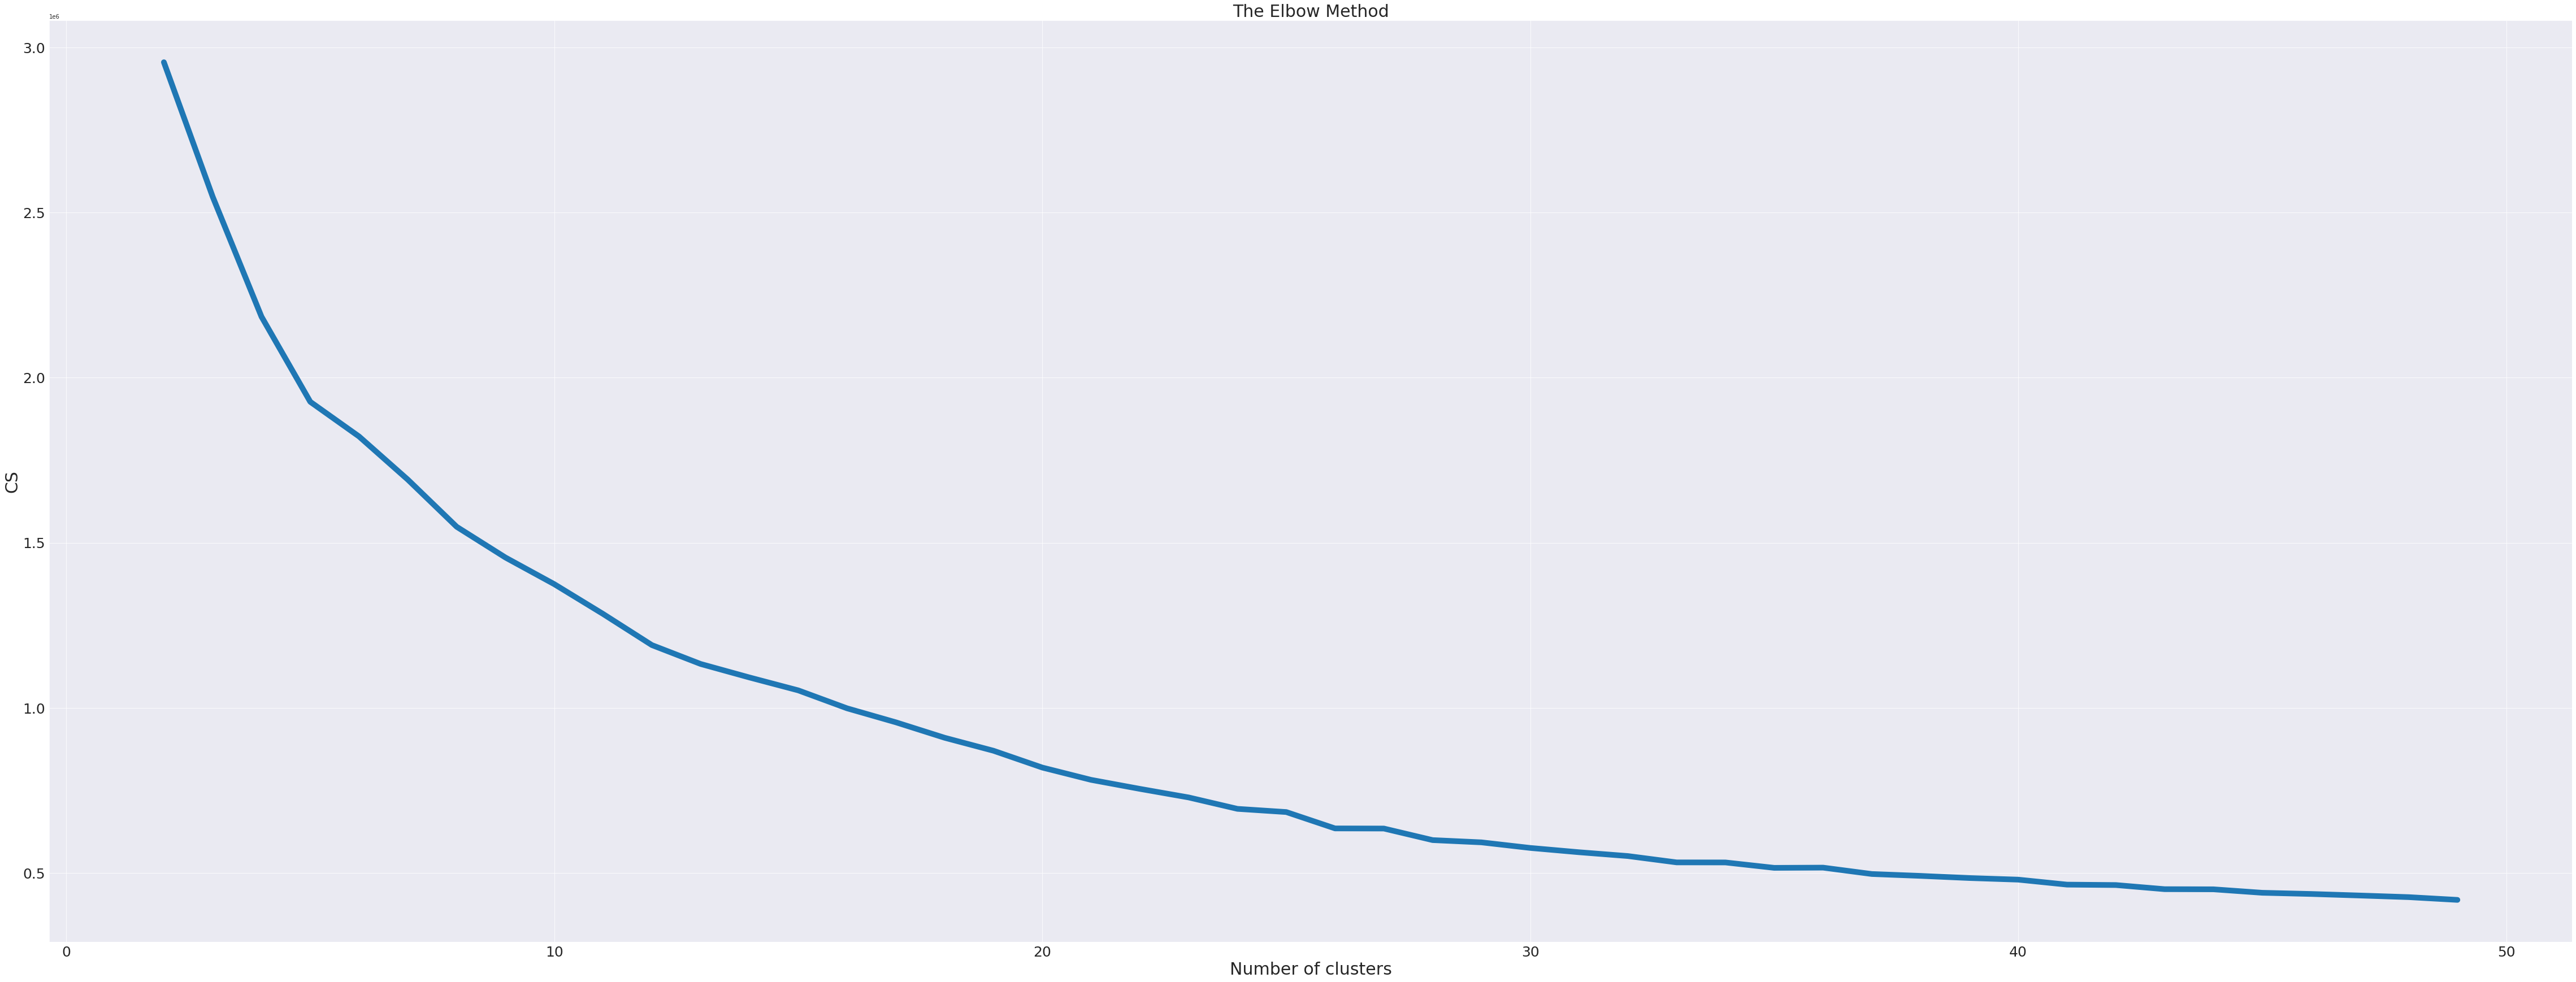

In [ ]:
plt.plot(range(2, 50), cs, linewidth = 10)
plt.tick_params(labelsize=25)
plt.rcParams["figure.figsize"] = (40,30)
plt.title('The Elbow Method', size=30)
plt.xlabel('Number of clusters',size=30)
plt.ylabel('CS',size=30)
plt.show()

In [ ]:
cluster_no = [a for a in range(2,50)]

In [ ]:
p1= pd.DataFrame([cluster_no, cs]).T
p1.columns = ['Cluster no','Inertia']

In [ ]:
p1

,Cluster no,Inertia
0,2.0,2.955103e+06
1,3.0,2.547798e+06
2,4.0,2.184727e+06
3,5.0,1.926866e+06
4,6.0,1.821872e+06
5,7.0,1.691118e+06
6,8.0,1.548507e+06
7,9.0,1.455388e+06
8,10.0,1.374726e+06
9,11.0,1.284567e+06


In [ ]:
# p1.to_csv('/content/drive/MyDrive/Shape Detection MEC/Other new data/ClusterNo_Inertia_14_1_23.csv')